# Machine Learning-Based Electricity Market Forecasting
**Group:** GP18  
**Presented By:** Duwarahavidyan J. (EG/2020/3919), Fernando S.A.D.S (EG/2020/3929)  
**Module:** EE7209 - Machine Learning (TE)    
**Date:** 2025-08-28
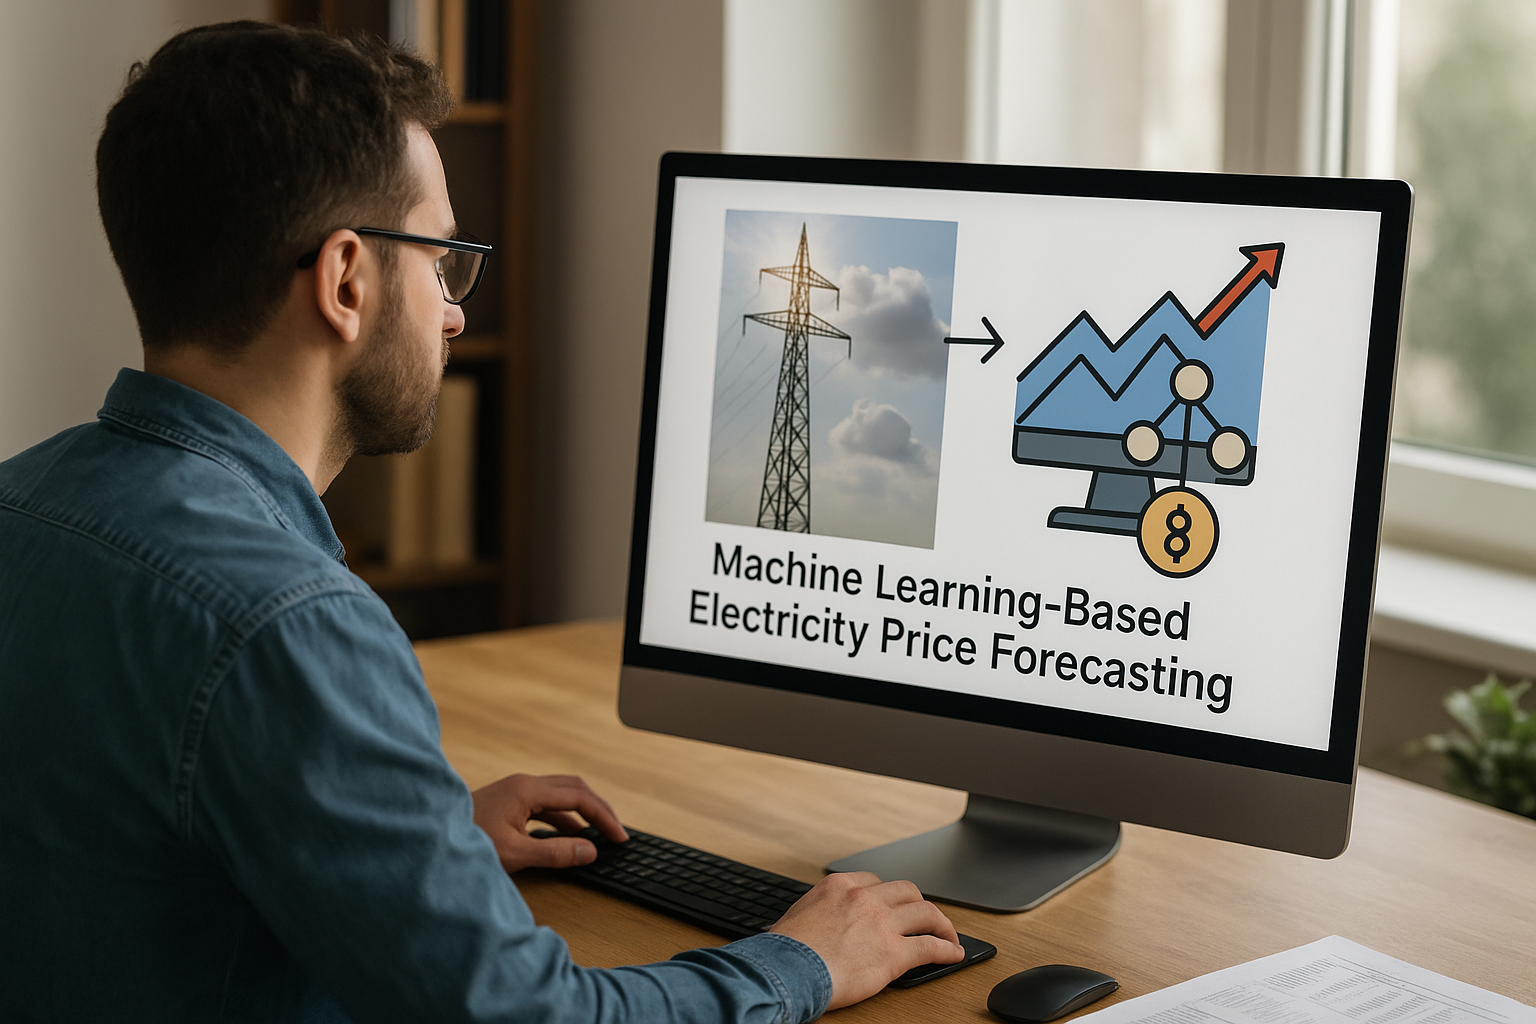


---



## 1. Introduction

The electricity market plays a vital role in ensuring the stability and efficiency of modern power systems. With increasing demand, diverse generation sources, and the growing influence of renewable energy, electricity prices are subject to frequent fluctuations. Accurate forecasting of electricity prices is therefore essential for market participants, policymakers, and consumers to make informed decisions on energy usage, pricing strategies, and resource allocation.

Traditional forecasting methods often struggle to capture the non-linear and complex relationships among the diverse factors influencing electricity prices, such as energy consumption patterns, generation sources, and weather conditions. In recent years, machine learning (ML) has emerged as a powerful tool capable of modeling such complexities and delivering more reliable predictions.

The project makes use of two primary datasets, namely an energy dataset that contains market and consumption-related variables and a weather dataset that provides meteorological attributes. Both datasets undergo preprocessing in order to improve consistency and data quality. After the initial preprocessing, they are combined into a single dataset, which is then subjected to further refinement to prepare it for model development.

The preprocessed dataset is used to construct predictive models with Support Vector Machines and Decision Trees. By employing these ML models, the study aims to build predictive models that estimate electricity prices 24 hours in advance. The research also intends to identify the key features that significantly influence price variations, thereby enhancing transparency in market dynamics.

The outcomes of this project are expected to support efficient energy management, enable more effective pricing strategies, and contribute to better decision-making for stakeholders in the electricity market. Ultimately, the proposed solution highlights the potential of machine learning as a transformative approach to tackling the challenges of modern energy forecasting.

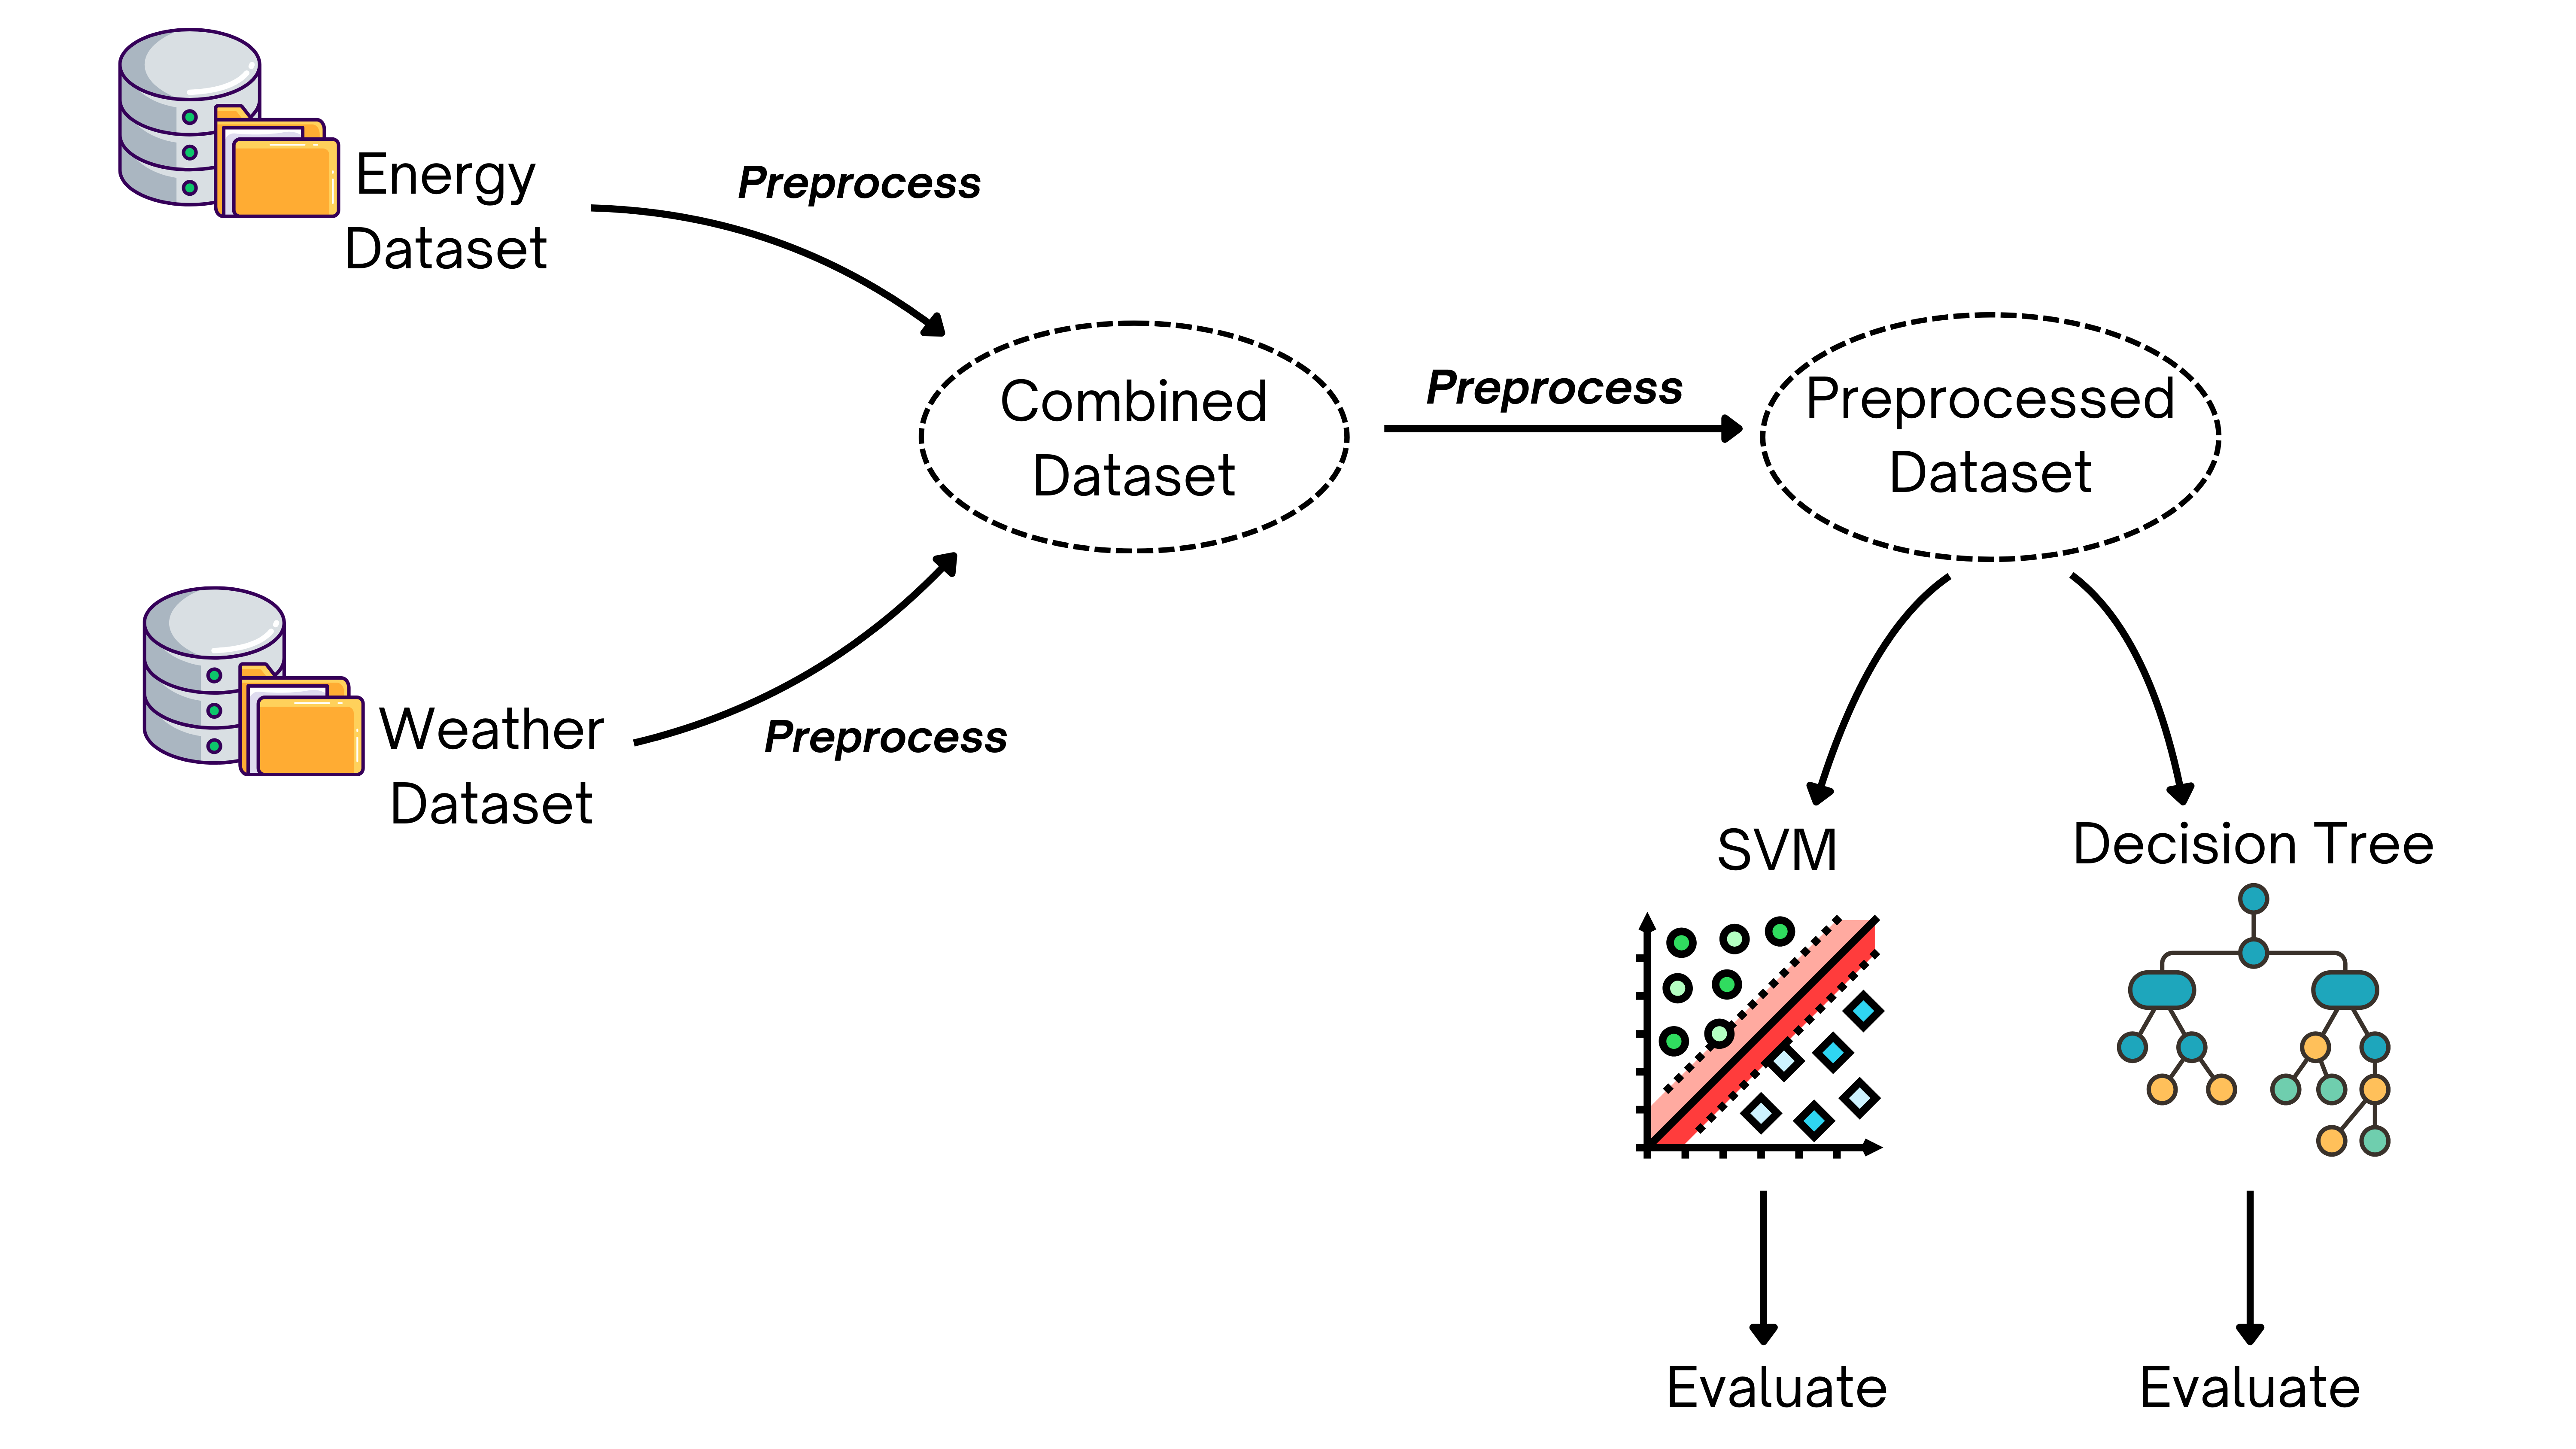

## 2. Literature Survey

Electricity price forecasting has been a widely researched topic due to its critical importance in improving energy market efficiency, demand management, and renewable energy integration. Traditional approaches such as Autoregressive Integrated Moving Average (ARIMA), Vector Autoregression (VAR), and regression-based models have been widely applied in time-series forecasting. However, these methods often fall short when modeling the complex, non-linear interactions between electricity demand, generation, and weather conditions, which has led to the growing adoption of machine learning (ML) methods [1], [2].

Several studies have specifically employed the Hourly Energy Demand, Generation, and Weather dataset from the Spanish electricity market, which is publicly available on Kaggle. Roussis [3] applied Deep Neural Networks (DNNs) along with exploratory data analysis to model the relationships between demand, generation, and weather variables, achieving improved forecasting accuracy compared to traditional statistical methods. Similarly, Oliver [4] tested a variety of ML models for electricity price forecasting using the same dataset and highlighted that weather-related variables play a vital role in short-term price dynamics.

In a related study, Liu et al. [5] utilized this dataset to design a multi-agent controller for shared energy systems, where accurate forecasting of prices and demand was essential for optimal energy allocation and decision-making. Furthermore, Ansari et al. [6] referenced the dataset in the benchmarking of foundation models such as Chronos for time-series forecasting, demonstrating its importance as a standard benchmark dataset.

From a methodological perspective, machine learning models such as Support Vector Regression (SVR), Decision Trees (DTs), and ensemble methods (Random Forests, XGBoost) have demonstrated superior ability to capture non-linear dependencies in electricity prices. Bilal et al. [7] compared SVR, Multi-Layer Perceptron (MLP), and ARIMA models for electricity demand and price forecasting and reported that SVR consistently outperformed traditional models in capturing the volatility and variability of electricity prices.

## 3. Environment & Setup

In [ ]:
# Connecting the Colab with Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing Required Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Loading the Dataset

energy_df = pd.read_csv('/content/drive/MyDrive/MLProject/energy_dataset.csv')
weather_df = pd.read_csv('/content/drive/MyDrive/MLProject/weather_features.csv')

## 4. Dataset Description

This project uses the public Hourly Energy Demand, Generation, Prices & Weather(Spain) dataset. It brings together four years of hourly market data (demand, generation by fuel, prices) with matching hourly weather for Spain’s five largest cities (Madrid, Barcelona, Valencia, Seville, Bilbao).

Dataset Link: [Hourly energy demand generation and weather](https://www.kaggle.com/datasets/nicholasjhana/energy-consumption-generation-prices-and-weather/data)

There are two dataset here.

* Energy Dataset (energy_dataset.csv) — Spain-wide hourly market data (

* Weather Dataset (weather_features.csv) — hourly meteorological variables for Madrid, Barcelona, Valencia, Seville, and Bilbao

Altogether we have 44 input features, and from that we predict the target variable price actual (EUR/MWh) 24 hours ahead (day-ahead price).


In [ ]:
#All the Columns in Energy Dataset

energy = energy_df.columns.values
print(energy)

['time' 'generation biomass' 'generation fossil brown coal/lignite'
 'generation fossil coal-derived gas' 'generation fossil gas'
 'generation fossil hard coal' 'generation fossil oil'
 'generation fossil oil shale' 'generation fossil peat'
 'generation geothermal' 'generation hydro pumped storage aggregated'
 'generation hydro pumped storage consumption'
 'generation hydro run-of-river and poundage'
 'generation hydro water reservoir' 'generation marine'
 'generation nuclear' 'generation other' 'generation other renewable'
 'generation solar' 'generation waste' 'generation wind offshore'
 'generation wind onshore' 'forecast solar day ahead'
 'forecast wind offshore eday ahead' 'forecast wind onshore day ahead'
 'total load forecast' 'total load actual' 'price day ahead'
 'price actual']


In above the `price actual` is the **target variable**

In [ ]:
#All the Columns in Weather Dataset

weather = weather_df.columns.values
print(weather)

['dt_iso' 'city_name' 'temp' 'temp_min' 'temp_max' 'pressure' 'humidity'
 'wind_speed' 'wind_deg' 'rain_1h' 'rain_3h' 'snow_3h' 'clouds_all'
 'weather_id' 'weather_main' 'weather_description' 'weather_icon']


## 5.  Exploratory Data Analysis (EDA) and Data Preprocessing

In [ ]:
# Shape of both dataset

energy_df.shape, weather_df.shape

((35064, 29), (178396, 17))

### 5.1 Analyzing Energy Dataset

In [ ]:
# Printing first 5 data of both data set

energy_df.head()

time  generation biomass  \
0  2015-01-01 00:00:00+01:00               447.0   
1  2015-01-01 01:00:00+01:00               449.0   
2  2015-01-01 02:00:00+01:00               448.0   
3  2015-01-01 03:00:00+01:00               438.0   
4  2015-01-01 04:00:00+01:00               428.0   

   generation fossil brown coal/lignite  generation fossil coal-derived gas  \
0                                 329.0                                 0.0   
1                                 328.0                                 0.0   
2                                 323.0                                 0.0   
3                                 254.0                                 0.0   
4                                 187.0                                 0.0   

   generation fossil gas  generation fossil hard coal  generation fossil oil  \
0                 4844.0                       4821.0                  162.0   
1                 5196.0                       4755.0                  158.0   
2                 4857.0                       4581.0                  157.0   
3                 4314.0                       4131.0                  160.0   
4                 4130.0                       3840.0                  156.0   

   generation fossil oil shale  generation fossil peat  generation geothermal  \
0                          0.0                     0.0                    0.0   
1                          0.0                     0.0                    0.0   
2                          0.0                     0.0                    0.0   
3                          0.0                     0.0                    0.0   
4                          0.0                     0.0                    0.0   

   ...  generation waste  generation wind offshore  generation wind onshore  \
0  ...             196.0                       0.0                   6378.0   
1  ...             195.0                       0.0                   5890.0   
2  ...             196.0                       0.0                   5461.0   
3  ...             191.0                       0.0                   5238.0   
4  ...             189.0                       0.0                   4935.0   

   forecast solar day ahead  forecast wind offshore eday ahead  \
0                      17.0                                NaN   
1                      16.0                                NaN   
2                       8.0                                NaN   
3                       2.0                                NaN   
4                       9.0                                NaN   

   forecast wind onshore day ahead  total load forecast  total load actual  \
0                           6436.0              26118.0            25385.0   
1                           5856.0              24934.0            24382.0   
2                           5454.0              23515.0            22734.0   
3                           5151.0              22642.0            21286.0   
4                           4861.0              21785.0            20264.0   

   price day ahead  price actual  
0            50.10         65.41  
1            48.10         64.92  
2            47.33         64.48  
3            42.27         59.32  
4            38.41         56.04  

[5 rows x 29 columns]

In [ ]:
# checking for empty columns

energy_df.isnull().sum()

time                                               0
generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                                  18
generation waste                                  19
generation wind offshore                          18
generation wind onshore                           18
forecast solar day ahead                           0
forecast wind offshore eday ahead              35064
forecast wind onshore day ahead                    0
total load forecast                                0
total load actual                                 36
price day ahead                                    0
price actual                                       0
dtype: int64

Based on above results two columns are completely **empty**. We will *drop* those columns.

Following columns will be dropped,


*   generation hydro pumped storage aggregated
*   forecast wind offshore day ahead



In [ ]:
# Dropping empty columns

energy_df = energy_df.drop(['generation hydro pumped storage aggregated', 'forecast wind offshore eday ahead'], axis=1)

In [ ]:
# Again printing first 5 data of Energy Dataset

energy_df.head()

time  generation biomass  \
0  2015-01-01 00:00:00+01:00               447.0   
1  2015-01-01 01:00:00+01:00               449.0   
2  2015-01-01 02:00:00+01:00               448.0   
3  2015-01-01 03:00:00+01:00               438.0   
4  2015-01-01 04:00:00+01:00               428.0   

   generation fossil brown coal/lignite  generation fossil coal-derived gas  \
0                                 329.0                                 0.0   
1                                 328.0                                 0.0   
2                                 323.0                                 0.0   
3                                 254.0                                 0.0   
4                                 187.0                                 0.0   

   generation fossil gas  generation fossil hard coal  generation fossil oil  \
0                 4844.0                       4821.0                  162.0   
1                 5196.0                       4755.0                  158.0   
2                 4857.0                       4581.0                  157.0   
3                 4314.0                       4131.0                  160.0   
4                 4130.0                       3840.0                  156.0   

   generation fossil oil shale  generation fossil peat  generation geothermal  \
0                          0.0                     0.0                    0.0   
1                          0.0                     0.0                    0.0   
2                          0.0                     0.0                    0.0   
3                          0.0                     0.0                    0.0   
4                          0.0                     0.0                    0.0   

   ...  generation solar  generation waste  generation wind offshore  \
0  ...              49.0             196.0                       0.0   
1  ...              50.0             195.0                       0.0   
2  ...              50.0             196.0                       0.0   
3  ...              50.0             191.0                       0.0   
4  ...              42.0             189.0                       0.0   

   generation wind onshore  forecast solar day ahead  \
0                   6378.0                      17.0   
1                   5890.0                      16.0   
2                   5461.0                       8.0   
3                   5238.0                       2.0   
4                   4935.0                       9.0   

   forecast wind onshore day ahead  total load forecast  total load actual  \
0                           6436.0              26118.0            25385.0   
1                           5856.0              24934.0            24382.0   
2                           5454.0              23515.0            22734.0   
3                           5151.0              22642.0            21286.0   
4                           4861.0              21785.0            20264.0   

   price day ahead  price actual  
0            50.10         65.41  
1            48.10         64.92  
2            47.33         64.48  
3            42.27         59.32  
4            38.41         56.04  

[5 rows x 27 columns]

In [ ]:
# Checking for columns that has 0 as entries

energy_df.isin([0]).sum()

time                                               0
generation biomass                                 4
generation fossil brown coal/lignite           10517
generation fossil coal-derived gas             35046
generation fossil gas                              1
generation fossil hard coal                        3
generation fossil oil                              3
generation fossil oil shale                    35046
generation fossil peat                         35046
generation geothermal                          35046
generation hydro pumped storage consumption    12607
generation hydro run-of-river and poundage         3
generation hydro water reservoir                   3
generation marine                              35045
generation nuclear                                 3
generation other                                   4
generation other renewable                         3
generation solar                                   3
generation waste                                   3
generation wind offshore                       35046
generation wind onshore                            3
forecast solar day ahead                         539
forecast wind onshore day ahead                    0
total load forecast                                0
total load actual                                  0
price day ahead                                    0
price actual                                       0
dtype: int64

From the above analysis, six columns are filled with 0s. This means these columns can be considered constant.

Following columns will be dropped:

* generation fossil coal-derived gas
* generation fossil oil shale
* generation fossil peat
* generation geothermal
* generation marine
* generation wind offshore

In [ ]:
# Dropping the above 6 columns

energy_processed_df = energy_df.drop(['generation fossil coal-derived gas', 'generation fossil oil shale', 'generation fossil peat', 'generation geothermal', 'generation marine', 'generation wind offshore'], axis=1)

In [ ]:
# Again printing first 5 data of Energy Dataset

energy_processed_df.head()

time  generation biomass  \
0  2015-01-01 00:00:00+01:00               447.0   
1  2015-01-01 01:00:00+01:00               449.0   
2  2015-01-01 02:00:00+01:00               448.0   
3  2015-01-01 03:00:00+01:00               438.0   
4  2015-01-01 04:00:00+01:00               428.0   

   generation fossil brown coal/lignite  generation fossil gas  \
0                                 329.0                 4844.0   
1                                 328.0                 5196.0   
2                                 323.0                 4857.0   
3                                 254.0                 4314.0   
4                                 187.0                 4130.0   

   generation fossil hard coal  generation fossil oil  \
0                       4821.0                  162.0   
1                       4755.0                  158.0   
2                       4581.0                  157.0   
3                       4131.0                  160.0   
4                       3840.0                  156.0   

   generation hydro pumped storage consumption  \
0                                        863.0   
1                                        920.0   
2                                       1164.0   
3                                       1503.0   
4                                       1826.0   

   generation hydro run-of-river and poundage  \
0                                      1051.0   
1                                      1009.0   
2                                       973.0   
3                                       949.0   
4                                       953.0   

   generation hydro water reservoir  generation nuclear  ...  \
0                            1899.0              7096.0  ...   
1                            1658.0              7096.0  ...   
2                            1371.0              7099.0  ...   
3                             779.0              7098.0  ...   
4                             720.0              7097.0  ...   

   generation other renewable  generation solar  generation waste  \
0                        73.0              49.0             196.0   
1                        71.0              50.0             195.0   
2                        73.0              50.0             196.0   
3                        75.0              50.0             191.0   
4                        74.0              42.0             189.0   

   generation wind onshore  forecast solar day ahead  \
0                   6378.0                      17.0   
1                   5890.0                      16.0   
2                   5461.0                       8.0   
3                   5238.0                       2.0   
4                   4935.0                       9.0   

   forecast wind onshore day ahead  total load forecast  total load actual  \
0                           6436.0              26118.0            25385.0   
1                           5856.0              24934.0            24382.0   
2                           5454.0              23515.0            22734.0   
3                           5151.0              22642.0            21286.0   
4                           4861.0              21785.0            20264.0   

   price day ahead  price actual  
0            50.10         65.41  
1            48.10         64.92  
2            47.33         64.48  
3            42.27         59.32  
4            38.41         56.04  

[5 rows x 21 columns]

In [ ]:
# Shape of Energy dataset

energy_processed_df.shape

(35064, 21)

### 5.2 Analyzing Weather Dataset

In [ ]:
# Printing first 5 data of Weather Dataset

weather_df.head()

dt_iso city_name     temp  temp_min  temp_max  pressure  \
0  2015-01-01 00:00:00+01:00  Valencia  270.475   270.475   270.475      1001   
1  2015-01-01 01:00:00+01:00  Valencia  270.475   270.475   270.475      1001   
2  2015-01-01 02:00:00+01:00  Valencia  269.686   269.686   269.686      1002   
3  2015-01-01 03:00:00+01:00  Valencia  269.686   269.686   269.686      1002   
4  2015-01-01 04:00:00+01:00  Valencia  269.686   269.686   269.686      1002   

   humidity  wind_speed  wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  \
0        77           1        62      0.0      0.0      0.0           0   
1        77           1        62      0.0      0.0      0.0           0   
2        78           0        23      0.0      0.0      0.0           0   
3        78           0        23      0.0      0.0      0.0           0   
4        78           0        23      0.0      0.0      0.0           0   

   weather_id weather_main weather_description weather_icon  
0         800        clear        sky is clear          01n  
1         800        clear        sky is clear          01n  
2         800        clear        sky is clear          01n  
3         800        clear        sky is clear          01n  
4         800        clear        sky is clear          01n

In aboove **weather_id** is the OpenWeather condition code for rain, snow, clouds and etc ..., and **weather_icon** is a display icon. Both are categorical summaries of weather already captured by other numeric variables like temp, humidity, wind_speed, clouds_all, rain_1h, snow_3h. Keeping them would require extra encoding. Therefore, we **drop weather_id and weather_icon** and retain only the numeric weather features for modeling.

In [ ]:
# Dropping weather_id and weather_icon

weather_df = weather_df.drop(['weather_id', 'weather_icon'], axis=1)

In [ ]:
# Again printing first 5 data of Weather Dataset

weather_df.head()

dt_iso city_name     temp  temp_min  temp_max  pressure  \
0  2015-01-01 00:00:00+01:00  Valencia  270.475   270.475   270.475      1001   
1  2015-01-01 01:00:00+01:00  Valencia  270.475   270.475   270.475      1001   
2  2015-01-01 02:00:00+01:00  Valencia  269.686   269.686   269.686      1002   
3  2015-01-01 03:00:00+01:00  Valencia  269.686   269.686   269.686      1002   
4  2015-01-01 04:00:00+01:00  Valencia  269.686   269.686   269.686      1002   

   humidity  wind_speed  wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  \
0        77           1        62      0.0      0.0      0.0           0   
1        77           1        62      0.0      0.0      0.0           0   
2        78           0        23      0.0      0.0      0.0           0   
3        78           0        23      0.0      0.0      0.0           0   
4        78           0        23      0.0      0.0      0.0           0   

  weather_main weather_description  
0        clear        sky is clear  
1        clear        sky is clear  
2        clear        sky is clear  
3        clear        sky is clear  
4        clear        sky is clear

In [ ]:
# checking for empty columns

weather_df.isnull().sum()

dt_iso                 0
city_name              0
temp                   0
temp_min               0
temp_max               0
pressure               0
humidity               0
wind_speed             0
wind_deg               0
rain_1h                0
rain_3h                0
snow_3h                0
clouds_all             0
weather_main           0
weather_description    0
dtype: int64

In [ ]:
# Shape of weather dataset

weather_df.shape

(178396, 15)

In [ ]:
# Checking for columns that has 0 as entries

weather_df.isin([0]).sum()

dt_iso                      0
city_name                   0
temp                        0
temp_min                    0
temp_max                    0
pressure                    2
humidity                   63
wind_speed              18490
wind_deg                24920
rain_1h                159008
rain_3h                176541
snow_3h                178129
clouds_all              82194
weather_main                0
weather_description         0
dtype: int64

Although there are several columns with zeros, those zeros often represent real conditions (no rain, calm wind, clear sky). These zeros carry signals for price, therefore these columns will not be dropped.

In [ ]:
# Dataset count based on city_name in weather dataset

weather_df['city_name'].value_counts()

city_name
Madrid        36267
Bilbao        35951
Seville       35557
 Barcelona    35476
Valencia      35145
Name: count, dtype: int64

[Text(0.5, 1.0, 'Plot of City Counts')]

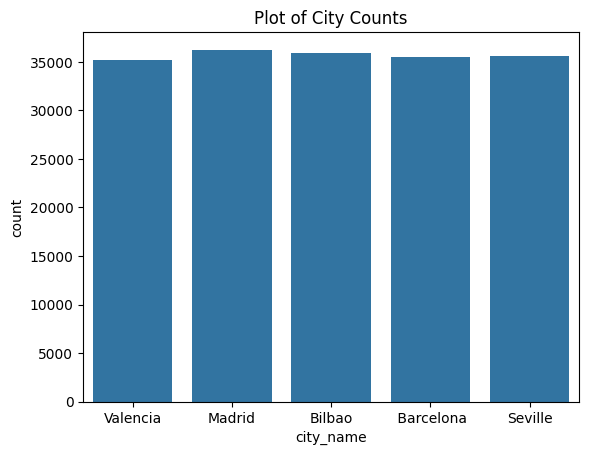

In [ ]:
# Ploting count of cities

sns.countplot(x='city_name', data=weather_df).set(title = 'Plot of City Counts')

In the above, each city has data from 2014-12-12 to 2018-12-12 recorded for each hour. Thus, we can combine this data with the Energy Dataset based on the timeframe. Before that, we need to take the average for each hour by considering all cities.

For this, we take mean on numerical features and mode on categorical features.

In [ ]:
# Aggregating the features across cities


# Parse time & clean city labels
weather_df["dt_iso"] = pd.to_datetime(weather_df["dt_iso"], utc=True).dt.tz_convert(None)
weather_df["city_name"] = weather_df["city_name"].str.strip()


# Columns to aggregate
num_cols = [
    "temp","temp_min","temp_max","pressure","humidity",
    "wind_speed","wind_deg","rain_1h","rain_3h","snow_3h","clouds_all"
]
cat_cols = ["weather_main", "weather_description"]  # categorical

# Aggregation helpers
def mode_or_nan(s: pd.Series):
    s = s.dropna()
    if s.empty:
        return np.nan
    m = s.mode()
    return m.iloc[0]  # if multiple modes, take the first deterministically

# Aggregate per hour across available cities
w_num  = (weather_df.groupby("dt_iso", as_index=False)[num_cols].mean()
                  .rename(columns={"dt_iso": "time"}))
w_cat  = (weather_df.groupby("dt_iso", as_index=False)[cat_cols].agg(mode_or_nan)
                  .rename(columns={
                      "dt_iso": "time",
                      "weather_main": "weather_main_mode",
                      "weather_description": "weather_desc_mode"

                  }))

# National hourly weather (uses available cities only each hour)
weather_processed_df = (w_num.merge(w_cat, on="time", how="outer")
                       .sort_values("time")
                       .reset_index(drop=True))


In [ ]:
# Shape of weather dataset

weather_processed_df.shape

(35064, 14)

In [ ]:
# Again printing first 5 data of Weather Dataset

weather_processed_df.head()

time        temp    temp_min    temp_max  pressure  humidity  \
0 2014-12-31 23:00:00  272.491463  272.491463  272.491463    1016.4      82.4   
1 2015-01-01 00:00:00  272.512700  272.512700  272.512700    1016.2      82.4   
2 2015-01-01 01:00:00  272.099137  272.099137  272.099137    1016.8      82.0   
3 2015-01-01 02:00:00  272.089469  272.089469  272.089469    1016.6      82.0   
4 2015-01-01 03:00:00  272.145900  272.145900  272.145900    1016.6      82.0   

   wind_speed  wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  \
0         2.0     135.2      0.0      0.0      0.0         0.0   
1         2.0     135.8      0.0      0.0      0.0         0.0   
2         2.4     119.0      0.0      0.0      0.0         0.0   
3         2.4     119.2      0.0      0.0      0.0         0.0   
4         2.4     118.4      0.0      0.0      0.0         0.0   

  weather_main_mode weather_desc_mode  
0             clear      sky is clear  
1             clear      sky is clear  
2             clear      sky is clear  
3             clear      sky is clear  
4             clear      sky is clear

### 5.3 Combining Both Dataset

In [ ]:
# check for time duplicates in both dataset based on time

energy_processed_df.duplicated(subset='time').sum(), weather_processed_df.duplicated(subset='time').sum()

(np.int64(0), np.int64(0))

In [ ]:
# Changing the timeframe
energy_processed_df["time"]  = pd.to_datetime(energy_processed_df["time"], utc=True).dt.tz_convert(None)
weather_processed_df["time"] = pd.to_datetime(weather_processed_df["time"], utc=True).dt.tz_convert(None)

In [ ]:
# Combine both dataset based on timeframe

combined_df = pd.merge(energy_processed_df, weather_processed_df, on='time', how='inner')

In [ ]:
combined_df.head()

time  generation biomass  \
0 2014-12-31 23:00:00               447.0   
1 2015-01-01 00:00:00               449.0   
2 2015-01-01 01:00:00               448.0   
3 2015-01-01 02:00:00               438.0   
4 2015-01-01 03:00:00               428.0   

   generation fossil brown coal/lignite  generation fossil gas  \
0                                 329.0                 4844.0   
1                                 328.0                 5196.0   
2                                 323.0                 4857.0   
3                                 254.0                 4314.0   
4                                 187.0                 4130.0   

   generation fossil hard coal  generation fossil oil  \
0                       4821.0                  162.0   
1                       4755.0                  158.0   
2                       4581.0                  157.0   
3                       4131.0                  160.0   
4                       3840.0                  156.0   

   generation hydro pumped storage consumption  \
0                                        863.0   
1                                        920.0   
2                                       1164.0   
3                                       1503.0   
4                                       1826.0   

   generation hydro run-of-river and poundage  \
0                                      1051.0   
1                                      1009.0   
2                                       973.0   
3                                       949.0   
4                                       953.0   

   generation hydro water reservoir  generation nuclear  ...  pressure  \
0                            1899.0              7096.0  ...    1016.4   
1                            1658.0              7096.0  ...    1016.2   
2                            1371.0              7099.0  ...    1016.8   
3                             779.0              7098.0  ...    1016.6   
4                             720.0              7097.0  ...    1016.6   

   humidity  wind_speed  wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  \
0      82.4         2.0     135.2      0.0      0.0      0.0         0.0   
1      82.4         2.0     135.8      0.0      0.0      0.0         0.0   
2      82.0         2.4     119.0      0.0      0.0      0.0         0.0   
3      82.0         2.4     119.2      0.0      0.0      0.0         0.0   
4      82.0         2.4     118.4      0.0      0.0      0.0         0.0   

   weather_main_mode  weather_desc_mode  
0              clear       sky is clear  
1              clear       sky is clear  
2              clear       sky is clear  
3              clear       sky is clear  
4              clear       sky is clear  

[5 rows x 34 columns]

In [ ]:
# Shape of the datasets

energy_processed_df.shape, weather_processed_df.shape, combined_df.shape

((35064, 21), (35064, 14), (35064, 34))

In [ ]:
# Saving the combined_df

combined_df.to_csv('/content/drive/MyDrive/MLProject/combined_dataset.csv', index=False)

### 5.4 Analyzing Combined Dataset

In [ ]:
# Loading the combined dataset

df = pd.read_csv('/content/drive/MyDrive/MLProject/combined_dataset.csv')

In [ ]:
# Shape of the dataset

df.shape

(35064, 34)

In [ ]:
# First 5 elements of combined dataset

df.head()

time  generation biomass  \
0  2014-12-31 23:00:00               447.0   
1  2015-01-01 00:00:00               449.0   
2  2015-01-01 01:00:00               448.0   
3  2015-01-01 02:00:00               438.0   
4  2015-01-01 03:00:00               428.0   

   generation fossil brown coal/lignite  generation fossil gas  \
0                                 329.0                 4844.0   
1                                 328.0                 5196.0   
2                                 323.0                 4857.0   
3                                 254.0                 4314.0   
4                                 187.0                 4130.0   

   generation fossil hard coal  generation fossil oil  \
0                       4821.0                  162.0   
1                       4755.0                  158.0   
2                       4581.0                  157.0   
3                       4131.0                  160.0   
4                       3840.0                  156.0   

   generation hydro pumped storage consumption  \
0                                        863.0   
1                                        920.0   
2                                       1164.0   
3                                       1503.0   
4                                       1826.0   

   generation hydro run-of-river and poundage  \
0                                      1051.0   
1                                      1009.0   
2                                       973.0   
3                                       949.0   
4                                       953.0   

   generation hydro water reservoir  generation nuclear  ...  pressure  \
0                            1899.0              7096.0  ...    1016.4   
1                            1658.0              7096.0  ...    1016.2   
2                            1371.0              7099.0  ...    1016.8   
3                             779.0              7098.0  ...    1016.6   
4                             720.0              7097.0  ...    1016.6   

   humidity  wind_speed  wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  \
0      82.4         2.0     135.2      0.0      0.0      0.0         0.0   
1      82.4         2.0     135.8      0.0      0.0      0.0         0.0   
2      82.0         2.4     119.0      0.0      0.0      0.0         0.0   
3      82.0         2.4     119.2      0.0      0.0      0.0         0.0   
4      82.0         2.4     118.4      0.0      0.0      0.0         0.0   

   weather_main_mode  weather_desc_mode  
0              clear       sky is clear  
1              clear       sky is clear  
2              clear       sky is clear  
3              clear       sky is clear  
4              clear       sky is clear  

[5 rows x 34 columns]

In [ ]:
# Printing a concise summary of the pandas dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 34 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil gas                        35046 non-null  float64
 4   generation fossil hard coal                  35046 non-null  float64
 5   generation fossil oil                        35045 non-null  float64
 6   generation hydro pumped storage consumption  35045 non-null  float64
 7   generation hydro run-of-river and poundage   35045 non-null  float64
 8   generation hydro water reservoir             35046 non-null  float64
 9   generation nuclear                           35047 non-null  float64
 10

In typical Machine Learing techniques, we usually drop the timeframe. But in our case, we cannot drop this as we depending on predicting the price 24 hours ahead. Thus we need to include this in our dataset.

Since the timeframe cannot be handled as shown above, we will split it to columns as `year`, `month`, `day` and `hour`.


In [ ]:
# Split the timeframe

df['time'] = pd.to_datetime(df['time'])

df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df['hour'] = df['time'].dt.hour

In [ ]:
# Add above columns as first four columns

cols = ['year', 'month', 'day','hour'] + [col for col in df.columns if col not in ['year', 'month', 'day','hour']]
df = df[cols]

In [ ]:
# Dropping the time column

df = df.drop(['time'], axis=1)

df.head()

year  month  day  hour  generation biomass  \
0  2014     12   31    23               447.0   
1  2015      1    1     0               449.0   
2  2015      1    1     1               448.0   
3  2015      1    1     2               438.0   
4  2015      1    1     3               428.0   

   generation fossil brown coal/lignite  generation fossil gas  \
0                                 329.0                 4844.0   
1                                 328.0                 5196.0   
2                                 323.0                 4857.0   
3                                 254.0                 4314.0   
4                                 187.0                 4130.0   

   generation fossil hard coal  generation fossil oil  \
0                       4821.0                  162.0   
1                       4755.0                  158.0   
2                       4581.0                  157.0   
3                       4131.0                  160.0   
4                       3840.0                  156.0   

   generation hydro pumped storage consumption  ...  pressure  humidity  \
0                                        863.0  ...    1016.4      82.4   
1                                        920.0  ...    1016.2      82.4   
2                                       1164.0  ...    1016.8      82.0   
3                                       1503.0  ...    1016.6      82.0   
4                                       1826.0  ...    1016.6      82.0   

   wind_speed  wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  \
0         2.0     135.2      0.0      0.0      0.0         0.0   
1         2.0     135.8      0.0      0.0      0.0         0.0   
2         2.4     119.0      0.0      0.0      0.0         0.0   
3         2.4     119.2      0.0      0.0      0.0         0.0   
4         2.4     118.4      0.0      0.0      0.0         0.0   

   weather_main_mode  weather_desc_mode  
0              clear       sky is clear  
1              clear       sky is clear  
2              clear       sky is clear  
3              clear       sky is clear  
4              clear       sky is clear  

[5 rows x 37 columns]

In [ ]:
# Making price actual as last column

cols = df.columns.tolist()
cols.remove('price actual')
cols.append('price actual')
df = df[cols]
df.head()

year  month  day  hour  generation biomass  \
0  2014     12   31    23               447.0   
1  2015      1    1     0               449.0   
2  2015      1    1     1               448.0   
3  2015      1    1     2               438.0   
4  2015      1    1     3               428.0   

   generation fossil brown coal/lignite  generation fossil gas  \
0                                 329.0                 4844.0   
1                                 328.0                 5196.0   
2                                 323.0                 4857.0   
3                                 254.0                 4314.0   
4                                 187.0                 4130.0   

   generation fossil hard coal  generation fossil oil  \
0                       4821.0                  162.0   
1                       4755.0                  158.0   
2                       4581.0                  157.0   
3                       4131.0                  160.0   
4                       3840.0                  156.0   

   generation hydro pumped storage consumption  ...  humidity  wind_speed  \
0                                        863.0  ...      82.4         2.0   
1                                        920.0  ...      82.4         2.0   
2                                       1164.0  ...      82.0         2.4   
3                                       1503.0  ...      82.0         2.4   
4                                       1826.0  ...      82.0         2.4   

   wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  weather_main_mode  \
0     135.2      0.0      0.0      0.0         0.0              clear   
1     135.8      0.0      0.0      0.0         0.0              clear   
2     119.0      0.0      0.0      0.0         0.0              clear   
3     119.2      0.0      0.0      0.0         0.0              clear   
4     118.4      0.0      0.0      0.0         0.0              clear   

   weather_desc_mode  price actual  
0       sky is clear         65.41  
1       sky is clear         64.92  
2       sky is clear         64.48  
3       sky is clear         59.32  
4       sky is clear         56.04  

[5 rows x 37 columns]

In [ ]:
# Printing a concise summary of the pandas dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 37 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   year                                         35064 non-null  int32  
 1   month                                        35064 non-null  int32  
 2   day                                          35064 non-null  int32  
 3   hour                                         35064 non-null  int32  
 4   generation biomass                           35045 non-null  float64
 5   generation fossil brown coal/lignite         35046 non-null  float64
 6   generation fossil gas                        35046 non-null  float64
 7   generation fossil hard coal                  35046 non-null  float64
 8   generation fossil oil                        35045 non-null  float64
 9   generation hydro pumped storage consumption  35045 non-null  float64
 10

#### 5.4.1 Feature Selection

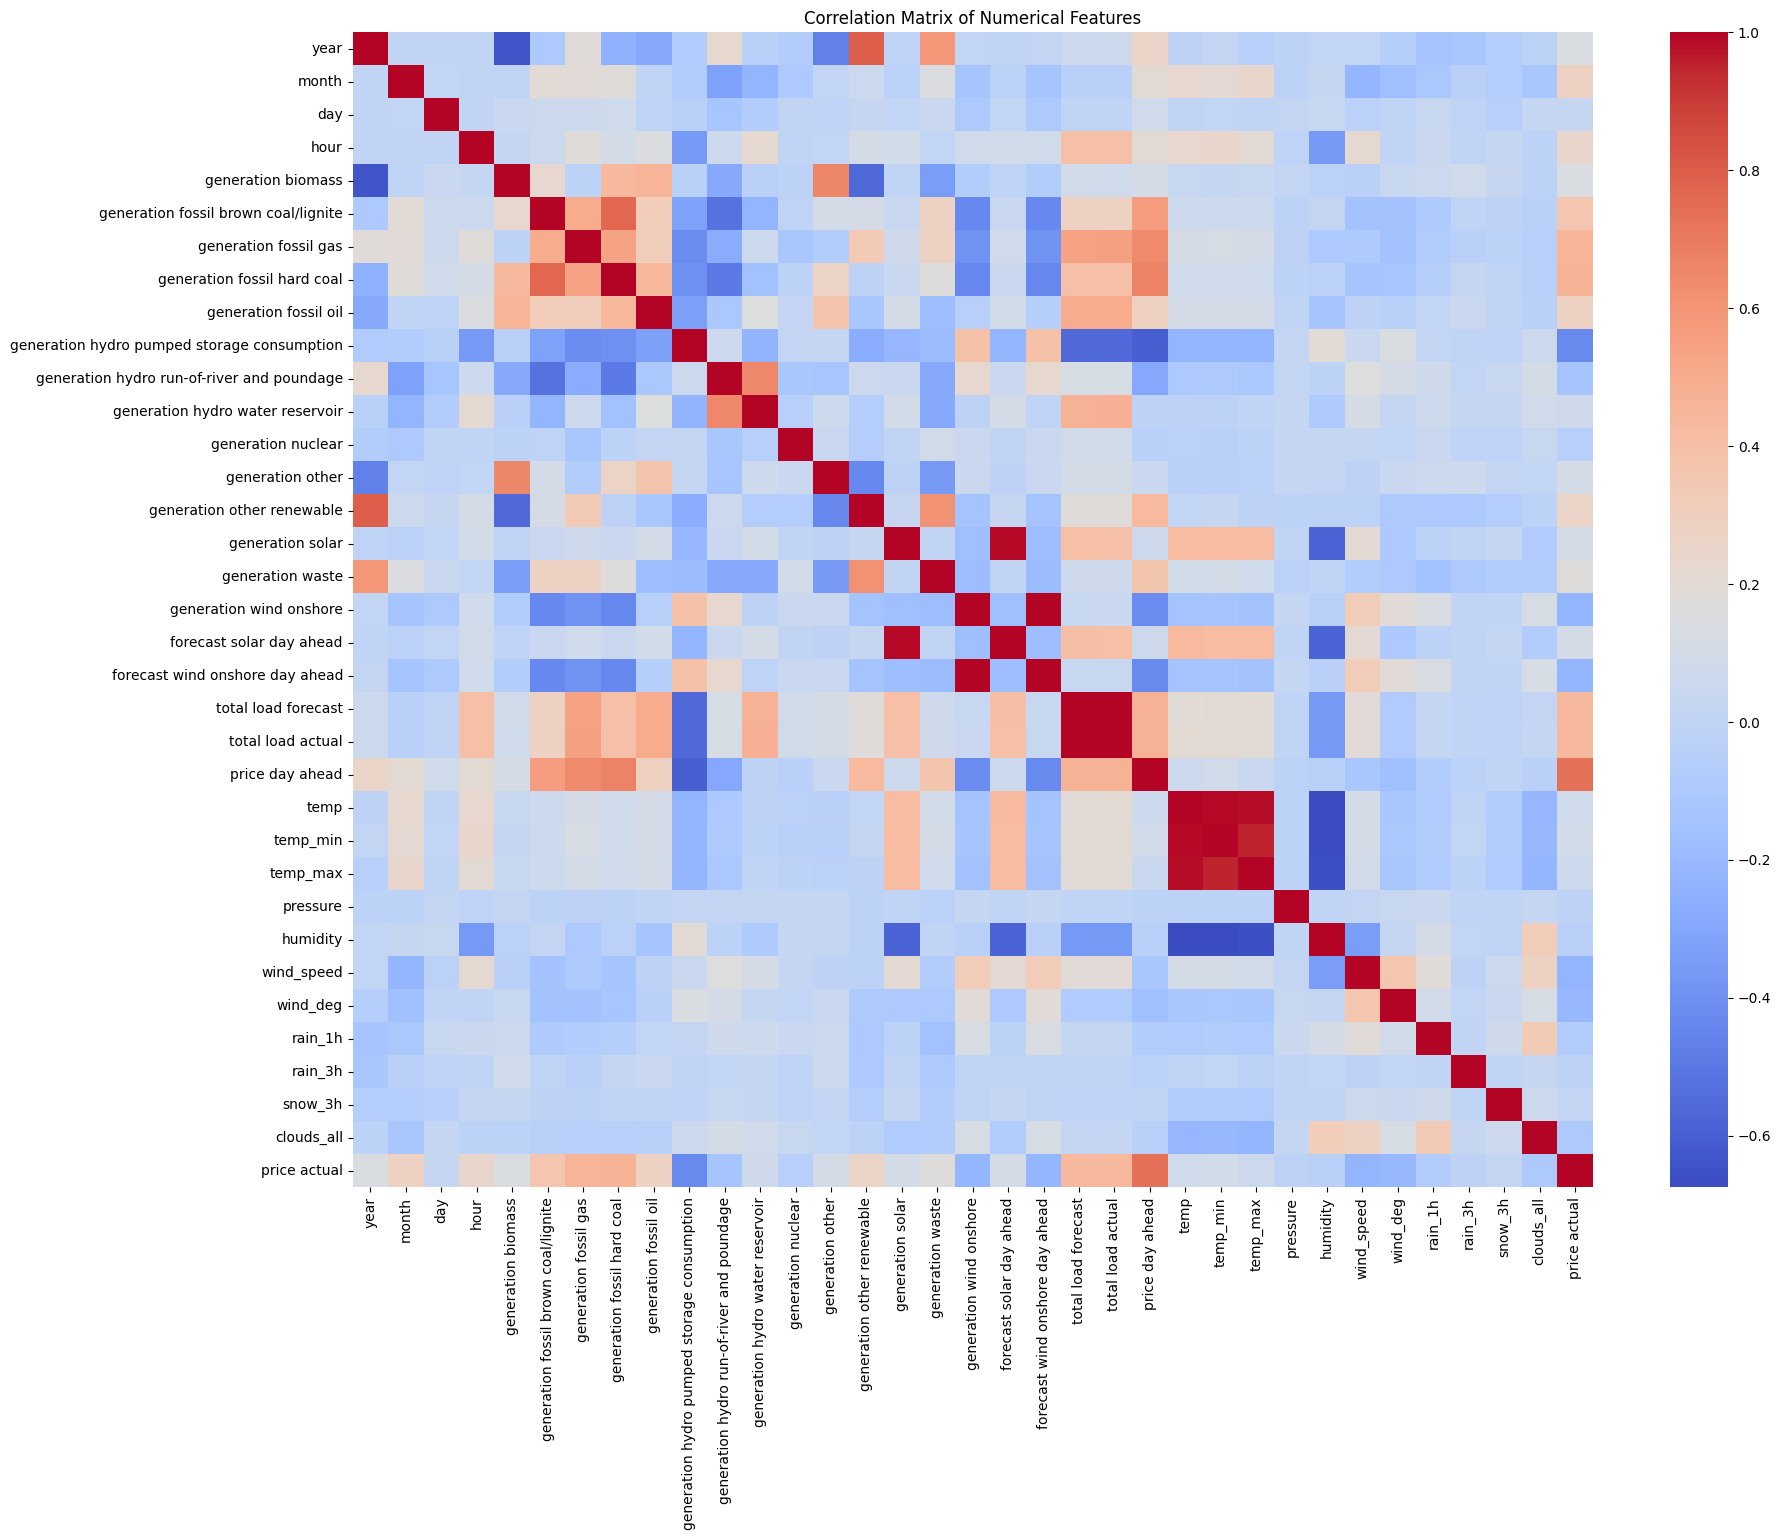

In [ ]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

# Calculate the correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

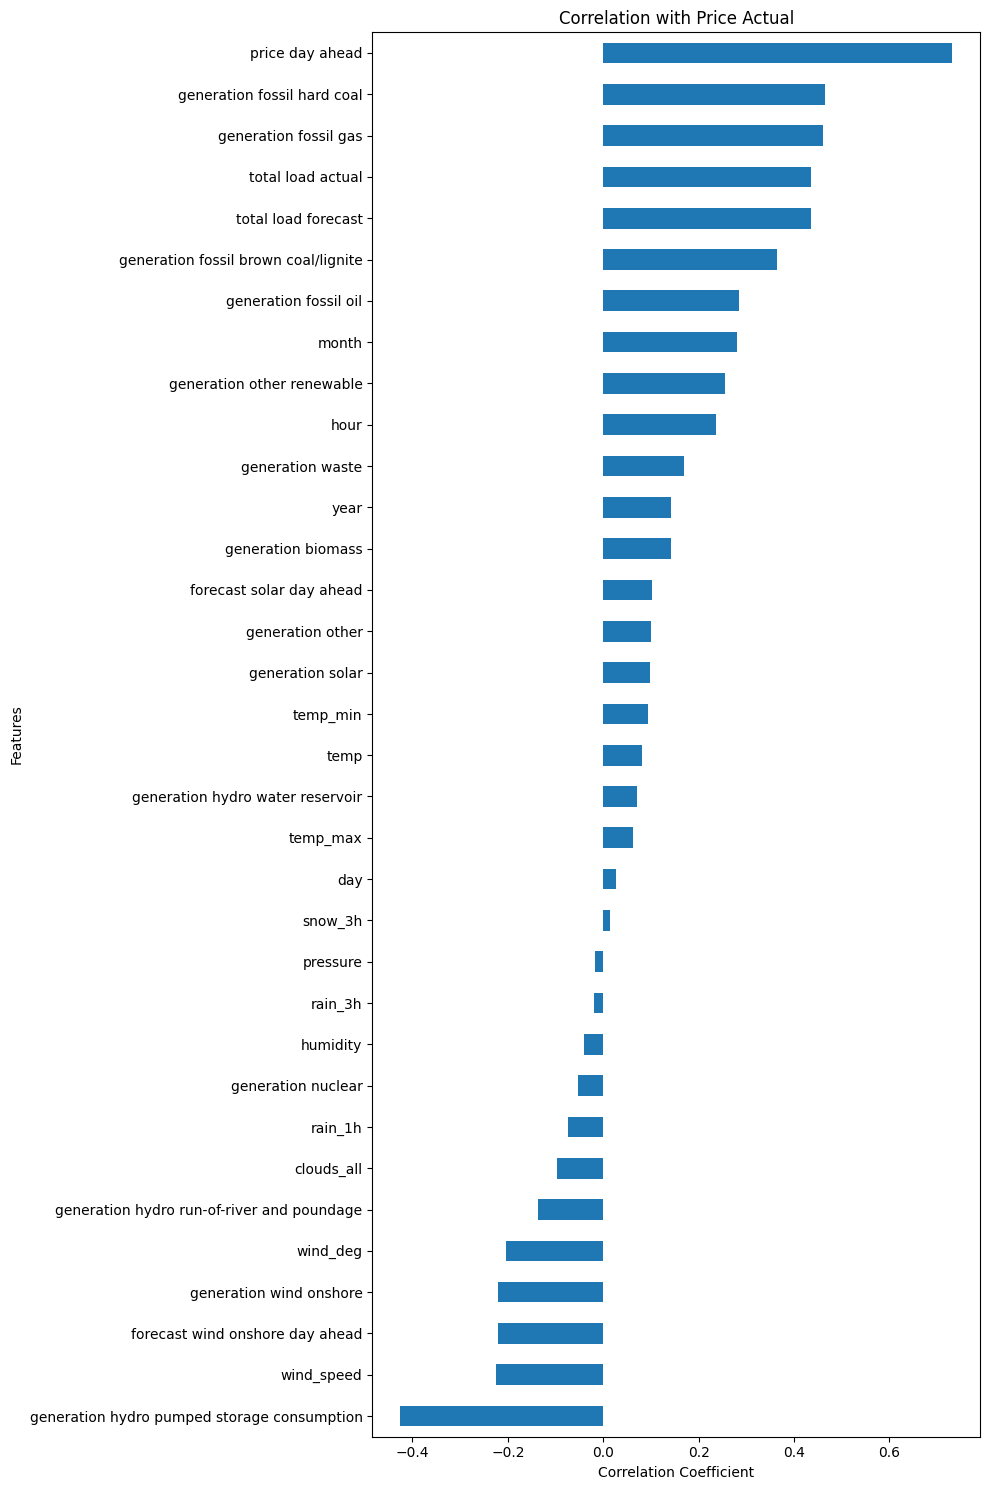

In [ ]:
# Correlation with price actual

correlation_with_price = df.corr(numeric_only=True)['price actual'].sort_values(ascending=True)

plt.figure(figsize=(10, 15))
correlation_with_price.drop('price actual').plot(kind='barh')
plt.title('Correlation with Price Actual')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

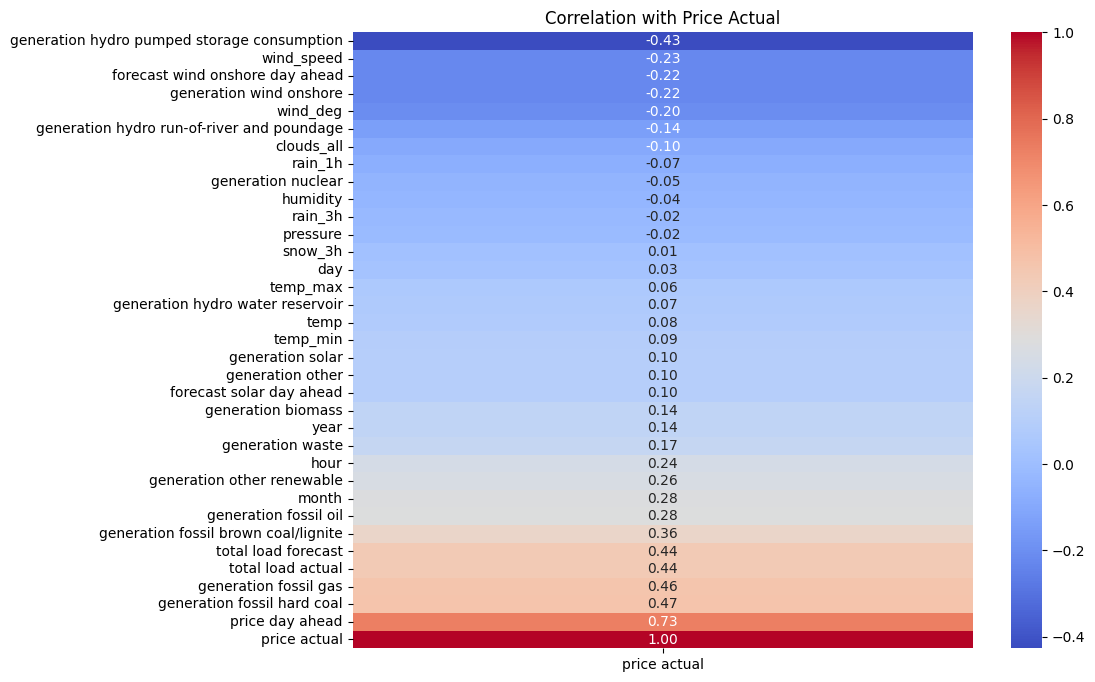

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_with_price.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation with Price Actual')
plt.show()

In [ ]:
# Sort correlations by absolute value in descending order
sorted_correlations = correlation_with_price.abs().sort_values(ascending=False)

# Display the sorted correlations (excluding 'price actual' itself)
display(sorted_correlations[1:])

price day ahead                                0.732155
generation fossil hard coal                    0.465641
generation fossil gas                          0.461706
total load actual                              0.436127
total load forecast                            0.435864
generation hydro pumped storage consumption    0.426417
generation fossil brown coal/lignite           0.364088
generation fossil oil                          0.284679
month                                          0.281219
generation other renewable                     0.256181
hour                                           0.237381
wind_speed                                     0.225336
forecast wind onshore day ahead                0.221706
generation wind onshore                        0.220830
wind_deg                                       0.203741
generation waste                               0.169605
year                                           0.142870
generation biomass                             0.142369
generation hydro run-of-river and poundage     0.137106
forecast solar day ahead                       0.101402
generation other                               0.100048
generation solar                               0.098488
clouds_all                                     0.097277
temp_min                                       0.093519
temp                                           0.080356
rain_1h                                        0.072874
generation hydro water reservoir               0.071549
temp_max                                       0.061787
generation nuclear                             0.052596
humidity                                       0.039439
day                                            0.026703
rain_3h                                        0.020192
pressure                                       0.016237
snow_3h                                        0.014884
Name: price actual, dtype: float64

We selected the following variables because they show the strongest linear association with `price actual` on the correlation matrix and they also make sense economically.

In [ ]:
# Select features with absolute correlation greater than 0.2
selected_features = correlation_with_price[correlation_with_price.abs() > 0.2].index.tolist()

# Exclude 'price actual' from the selected features
if 'price actual' in selected_features:
    selected_features.remove('price actual')

display(selected_features)

['generation hydro pumped storage consumption',
 'wind_speed',
 'forecast wind onshore day ahead',
 'generation wind onshore',
 'wind_deg',
 'hour',
 'generation other renewable',
 'month',
 'generation fossil oil',
 'generation fossil brown coal/lignite',
 'total load forecast',
 'total load actual',
 'generation fossil gas',
 'generation fossil hard coal',
 'price day ahead']

In [ ]:
# Define the target variable

df_target = df['price actual']

In [ ]:
# Dataset with selected features

df_selected = df[selected_features + ['price actual']]

df_selected.head()

generation hydro pumped storage consumption  wind_speed  \
0                                        863.0         2.0   
1                                        920.0         2.0   
2                                       1164.0         2.4   
3                                       1503.0         2.4   
4                                       1826.0         2.4   

   forecast wind onshore day ahead  generation wind onshore  wind_deg  hour  \
0                           6436.0                   6378.0     135.2    23   
1                           5856.0                   5890.0     135.8     0   
2                           5454.0                   5461.0     119.0     1   
3                           5151.0                   5238.0     119.2     2   
4                           4861.0                   4935.0     118.4     3   

   generation other renewable  month  generation fossil oil  \
0                        73.0     12                  162.0   
1                        71.0      1                  158.0   
2                        73.0      1                  157.0   
3                        75.0      1                  160.0   
4                        74.0      1                  156.0   

   generation fossil brown coal/lignite  total load forecast  \
0                                 329.0              26118.0   
1                                 328.0              24934.0   
2                                 323.0              23515.0   
3                                 254.0              22642.0   
4                                 187.0              21785.0   

   total load actual  generation fossil gas  generation fossil hard coal  \
0            25385.0                 4844.0                       4821.0   
1            24382.0                 5196.0                       4755.0   
2            22734.0                 4857.0                       4581.0   
3            21286.0                 4314.0                       4131.0   
4            20264.0                 4130.0                       3840.0   

   price day ahead  price actual  
0            50.10         65.41  
1            48.10         64.92  
2            47.33         64.48  
3            42.27         59.32  
4            38.41         56.04

In [ ]:
# Shape of selected dataset

df_selected.shape

(35064, 16)

According to above, now we have reduced the features from 33 to 15.

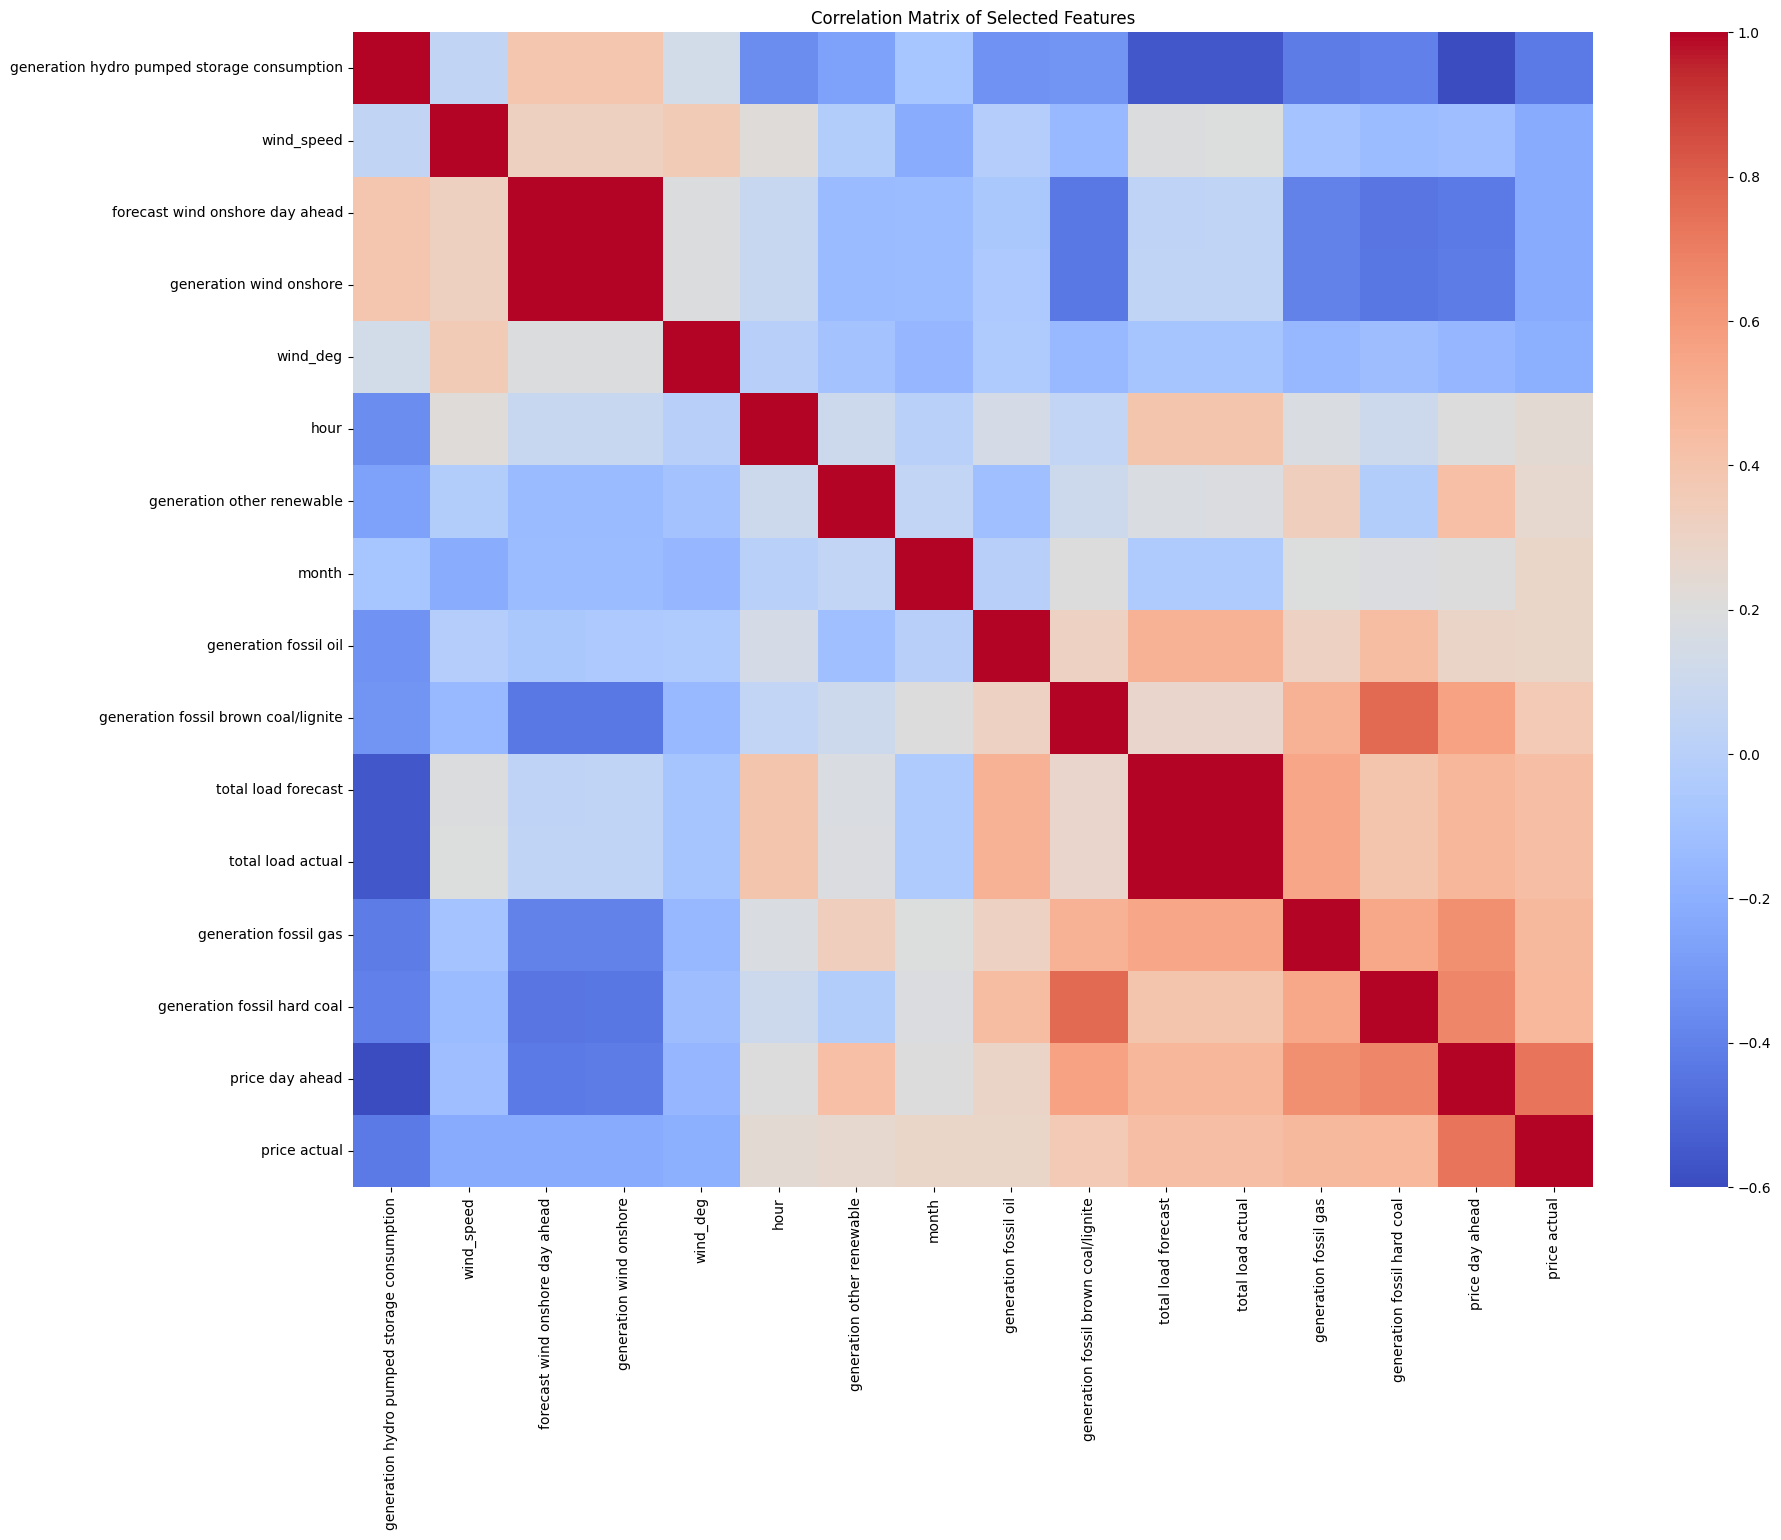

In [ ]:
# Calculate the correlation matrix between the selected features and the target
corr_matrix = df_selected.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Selected Features')
plt.show()

In [ ]:
# Numerical Representation of the Correlation

correlation_matrix = df_selected.corr(numeric_only=True)
display(correlation_matrix)

generation hydro pumped storage consumption  \
generation hydro pumped storage consumption                                     1.000000   
wind_speed                                                                      0.045822   
forecast wind onshore day ahead                                                 0.390454   
generation wind onshore                                                         0.389054   
wind_deg                                                                        0.137122   
hour                                                                           -0.355029   
generation other renewable                                                     -0.267440   
month                                                                          -0.077238   
generation fossil oil                                                          -0.331011   
generation fossil brown coal/lignite                                           -0.323771   
total load forecast                                                            -0.559756   
total load actual                                                              -0.562809   
generation fossil gas                                                          -0.420646   
generation fossil hard coal                                                    -0.406116   
price day ahead                                                                -0.600460   
price actual                                                                   -0.426417   

                                             wind_speed  \
generation hydro pumped storage consumption    0.045822   
wind_speed                                     1.000000   
forecast wind onshore day ahead                0.323544   
generation wind onshore                        0.324155   
wind_deg                                       0.361267   
hour                                           0.217467   
generation other renewable                    -0.020776   
month                                         -0.218462   
generation fossil oil                         -0.016463   
generation fossil brown coal/lignite          -0.148313   
total load forecast                            0.193291   
total load actual                              0.194898   
generation fossil gas                         -0.090790   
generation fossil hard coal                   -0.136938   
price day ahead                               -0.124252   
price actual                                  -0.225336   

                                             forecast wind onshore day ahead  \
generation hydro pumped storage consumption                         0.390454   
wind_speed                                                          0.323544   
forecast wind onshore day ahead                                     1.000000   
generation wind onshore                                             0.994459   
wind_deg                                                            0.192051   
hour                                                                0.077831   
generation other renewable                                         -0.140023   
month                                                              -0.136132   
generation fossil oil                                              -0.058244   
generation fossil brown coal/lignite                               -0.436031   
total load forecast                                                 0.035308   
total load actual                                                   0.037597   
generation fossil gas                                              -0.397303   
generation fossil hard coal                                        -0.444490   
price day ahead                                                    -0.428874   
price actual                                                       -0.221706   

                                             generation wind onshore  \
generation hydro pumped storage consumption

According to above heatmap multiple variables carried the same signal, we kept just one to reduce multicollinearity.


* `total load forecast` and `total load actual` are highly correlated.
* `forecast wind onshore day ahead` and `generation wind onshore` are highly correlated.

Multicollinearity can affect the performance and interpretability of certain models. We can address this by keeping only one feature from each highly correlated pair.

Also here `weather_main` and `weather_description` are textual labels that summarize conditions already captured by numeric features (temp, humidity, wind, rain, clouds). After aggregating across 5 cities, their per-hour mode is unstable and, when one-hot encoded, creates sparse, low-frequency columns that add complexity and multicollinearity with minimal incremental signal. To keep the model compact, avoid noisy categories, and rely on the more informative numeric drivers, we drop both categorical fields.


In [ ]:
# Selected Features

features = [
    "month",
    "hour",
    "generation hydro pumped storage consumption",
    "forecast wind onshore day ahead",
    "generation other renewable",
    "generation fossil oil",
    "generation fossil gas",
    "generation fossil hard coal",
    "generation fossil brown coal/lignite",
    "total load forecast",
    "wind_speed",
    "wind_deg",
    "price day ahead"
]

target = "price actual"

In [ ]:
# Final Dataset

df_final = df[features + [target]]

df_final.head()

month  hour  generation hydro pumped storage consumption  \
0     12    23                                        863.0   
1      1     0                                        920.0   
2      1     1                                       1164.0   
3      1     2                                       1503.0   
4      1     3                                       1826.0   

   forecast wind onshore day ahead  generation other renewable  \
0                           6436.0                        73.0   
1                           5856.0                        71.0   
2                           5454.0                        73.0   
3                           5151.0                        75.0   
4                           4861.0                        74.0   

   generation fossil oil  generation fossil gas  generation fossil hard coal  \
0                  162.0                 4844.0                       4821.0   
1                  158.0                 5196.0                       4755.0   
2                  157.0                 4857.0                       4581.0   
3                  160.0                 4314.0                       4131.0   
4                  156.0                 4130.0                       3840.0   

   generation fossil brown coal/lignite  total load forecast  wind_speed  \
0                                 329.0              26118.0         2.0   
1                                 328.0              24934.0         2.0   
2                                 323.0              23515.0         2.4   
3                                 254.0              22642.0         2.4   
4                                 187.0              21785.0         2.4   

   wind_deg  price day ahead  price actual  
0     135.2            50.10         65.41  
1     135.8            48.10         64.92  
2     119.0            47.33         64.48  
3     119.2            42.27         59.32  
4     118.4            38.41         56.04

In [ ]:
# Shape of the final dataset

df_final.shape

(35064, 14)

Finally we have 13 features altogether.

#### 5.4.2 Split the Dataset

In [ ]:
from sklearn.model_selection import train_test_split

X = df_final.drop('price actual', axis=1)  # features
y = df_selected['price actual']            # target

# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Printing the train dataset

display(X_train.head())

month  hour  generation hydro pumped storage consumption  \
14233      8     0                                          0.0   
29000      4     7                                          0.0   
11074      4     9                                          5.0   
616        1    15                                          0.0   
19057      3     0                                        304.0   

       forecast wind onshore day ahead  generation other renewable  \
14233                           3575.0                        68.0   
29000                           2671.0                        89.0   
11074                           1403.0                        84.0   
616                             5547.0                        74.0   
19057                           3190.0                        94.0   

       generation fossil oil  generation fossil gas  \
14233                  230.0                 4830.0   
29000                  285.0                 5531.0   
11074                  272.0                 4328.0   
616                    318.0                 5385.0   
19057                  272.0                 4315.0   

       generation fossil hard coal  generation fossil brown coal/lignite  \
14233                       2694.0                                  42.0   
29000                       2202.0                                   0.0   
11074                       1885.0                                   0.0   
616                         7563.0                                 965.0   
19057                       4600.0                                 500.0   

       total load forecast  wind_speed  wind_deg  price day ahead  
14233              22713.0         0.6     201.6            46.35  
29000              30626.0         1.0     172.4            54.50  
11074              28164.0         3.0     164.0            38.38  
616                34832.0         2.8     201.2            62.75  
19057              23824.0         1.4     157.4            43.81

In [ ]:
# Printing the test dataset

display(X_test.head())

month  hour  generation hydro pumped storage consumption  \
6070       9    21                                        389.0   
32600      9     7                                          0.0   
8846       1    13                                          0.0   
1483       3    18                                          0.0   
4219       6    18                                          0.0   

       forecast wind onshore day ahead  generation other renewable  \
6070                            1918.0                        73.0   
32600                           1261.0                       112.0   
8846                            6308.0                        94.0   
1483                            2778.0                        73.0   
4219                            2333.0                        57.0   

       generation fossil oil  generation fossil gas  \
6070                   324.0                 5625.0   
32600                  326.0                 7406.0   
8846                   387.0                 3789.0   
1483                   327.0                 7463.0   
4219                   359.0                 6477.0   

       generation fossil hard coal  generation fossil brown coal/lignite  \
6070                        7071.0                                 864.0   
32600                       5937.0                                 740.0   
8846                        1172.0                                   0.0   
1483                        4492.0                                   0.0   
4219                        8023.0                                 653.0   

       total load forecast  wind_speed  wind_deg  price day ahead  
6070               25374.0         1.8     110.0            52.62  
32600              32568.0         1.0     120.8            76.30  
8846               31902.0         7.0     238.0            33.45  
1483               33860.0         1.6     209.2            67.32  
4219               30992.0         3.0     206.0            59.61

In [ ]:
# Shape of the train and test dataset

X_train.shape, X_test.shape

((28051, 13), (7013, 13))

#### 5.4.3 Handling Missing/Null Values

In [ ]:
# Checking for missing/null values

display(X_train.isnull().sum())
display(X_test.isnull().sum())

month                                           0
hour                                            0
generation hydro pumped storage consumption    17
forecast wind onshore day ahead                 0
generation other renewable                     16
generation fossil oil                          17
generation fossil gas                          16
generation fossil hard coal                    16
generation fossil brown coal/lignite           16
total load forecast                             0
wind_speed                                      0
wind_deg                                        0
price day ahead                                 0
dtype: int64

month                                          0
hour                                           0
generation hydro pumped storage consumption    2
forecast wind onshore day ahead                0
generation other renewable                     2
generation fossil oil                          2
generation fossil gas                          2
generation fossil hard coal                    2
generation fossil brown coal/lignite           2
total load forecast                            0
wind_speed                                     0
wind_deg                                       0
price day ahead                                0
dtype: int64

There are several null values in the dataset, which should be treated before proceeding further. Since we are dealing with a **time series dataset**, instead of removing the null values, we impute the missing values using **forward fill**, i.e. by replacing them with the previous value.

In [ ]:
# Imputing Missing Value with Forward Fill

X_train = X_train.fillna(method='ffill')
X_test = X_test.fillna(method='ffill')

display(X_train.isnull().sum())
display(X_test.isnull().sum())

/tmp/ipython-input-2052575251.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_train = X_train.fillna(method='ffill')
/tmp/ipython-input-2052575251.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_test = X_test.fillna(method='ffill')


month                                          0
hour                                           0
generation hydro pumped storage consumption    0
forecast wind onshore day ahead                0
generation other renewable                     0
generation fossil oil                          0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil brown coal/lignite           0
total load forecast                            0
wind_speed                                     0
wind_deg                                       0
price day ahead                                0
dtype: int64

month                                          0
hour                                           0
generation hydro pumped storage consumption    0
forecast wind onshore day ahead                0
generation other renewable                     0
generation fossil oil                          0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil brown coal/lignite           0
total load forecast                            0
wind_speed                                     0
wind_deg                                       0
price day ahead                                0
dtype: int64

#### 5.4.4 Treating Outliers

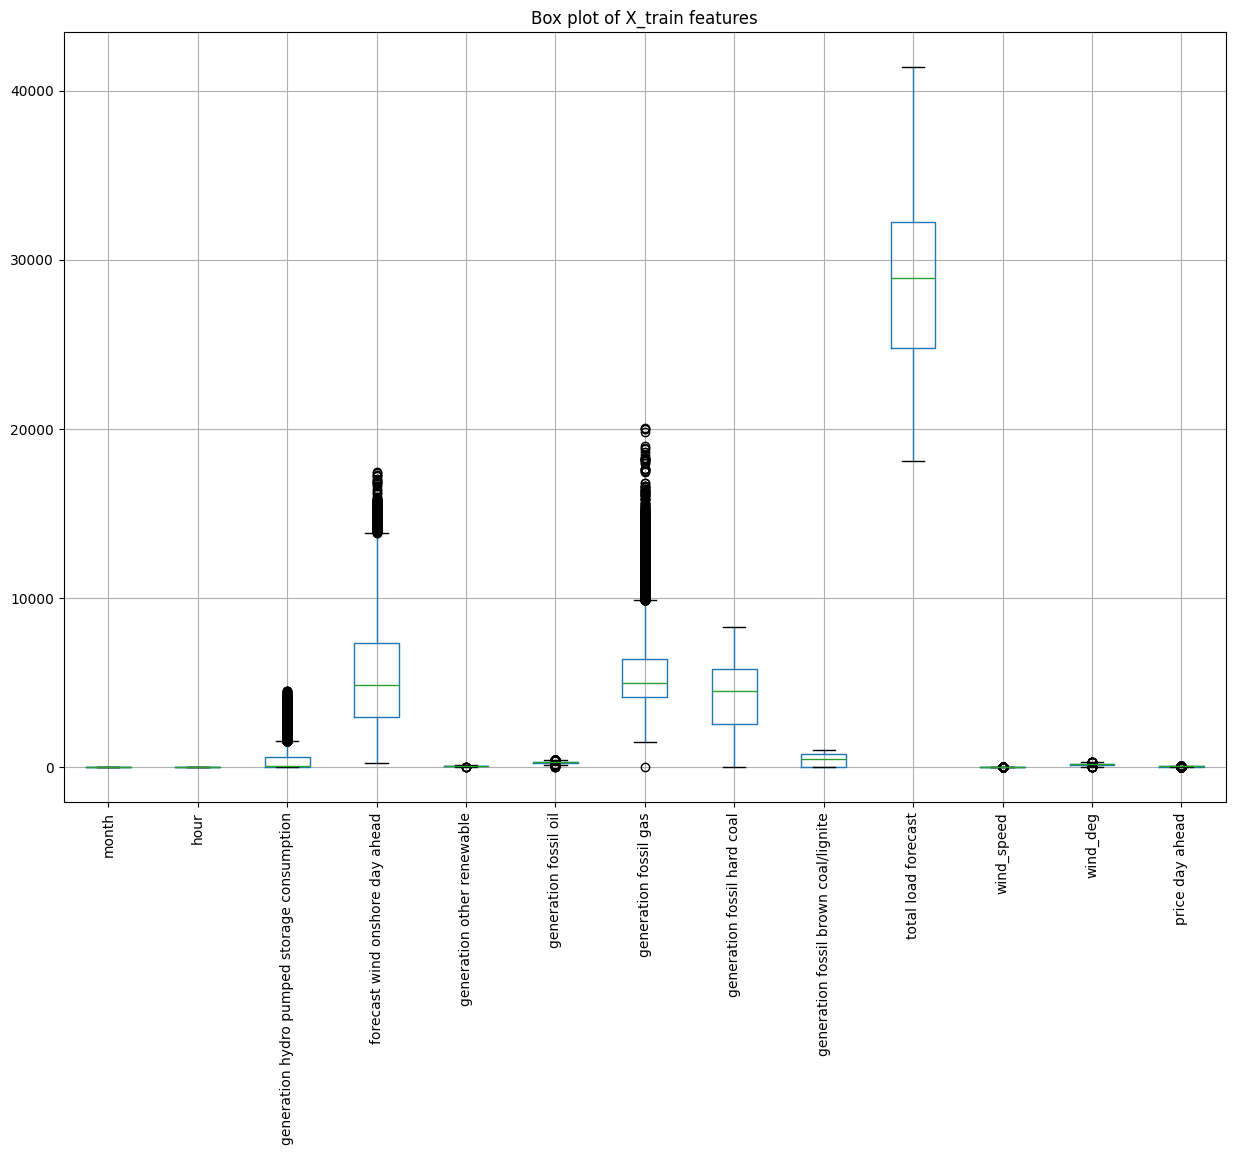

In [ ]:
# Visualize distributions with box plots for train dataset

plt.figure(figsize=(15, 10))
X_train.boxplot()
plt.title('Box plot of X_train features')
plt.xticks(rotation=90)
plt.show()

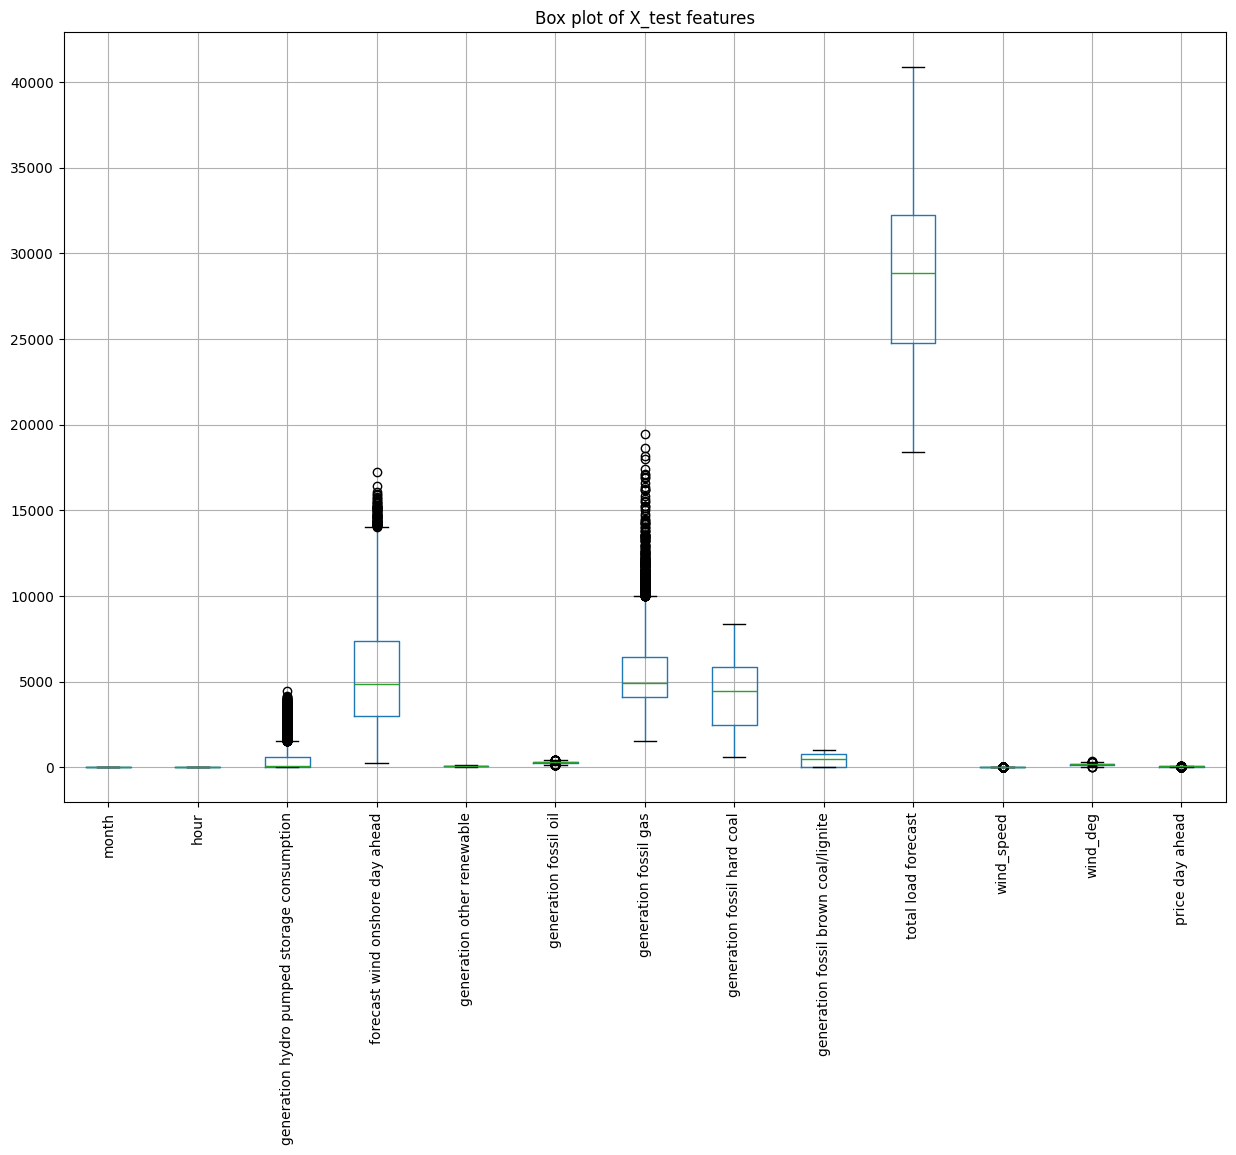

In [ ]:
# Visualize distributions with box plots for test dataset

plt.figure(figsize=(15, 10))
X_test.boxplot()
plt.title('Box plot of X_test features')
plt.xticks(rotation=90)
plt.show()

In [ ]:
def count_outliers(df):
    outlier_counts = {}
    for column in df.select_dtypes(include=np.number).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_counts[column] = len(outliers)
    return outlier_counts

outliers_train = count_outliers(X_train)
outliers_test = count_outliers(X_test)

total_outliers_train = sum(outliers_train.values())
total_outliers_test = sum(outliers_test.values())

print(f"\nTotal number of outliers in the training set: {total_outliers_train}")
print(f"Total number of outliers in the testing set: {total_outliers_test}")


Total number of outliers in the training set: 6645
Total number of outliers in the testing set: 1661


As shown above, we have a large number of outliers. This can have a significant impact on the results of machine learning algorithms. Therefore we need to treat them before procedding further. Since our dataset is **very small**, we will use the method of **capping** to treat the outliers. Here, we decide an upper threshold and lower threshold value and assign those same values to all data points above or below that threshold accordingly.


In [ ]:
# Define a function to cap outliers using IQR
def cap_outliers_iqr(df, column, lower_quantile=0.25, upper_quantile=0.75):
    Q1 = df[column].quantile(lower_quantile)
    Q3 = df[column].quantile(upper_quantile)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# Apply outlier capping to each numerical column in X_train
for col in X_train.select_dtypes(include=np.number).columns:
    X_train = cap_outliers_iqr(X_train, col)

# Apply the same capping to X_test using thresholds calculated from X_train
# Recalculate thresholds based on X_train for X_test capping
for col in X_train.select_dtypes(include=np.number).columns:
    Q1_train = X_train[col].quantile(0.25)
    Q3_train = X_train[col].quantile(0.75)
    IQR_train = Q3_train - Q1_train
    lower_bound_train = Q1_train - 1.5 * IQR_train
    upper_bound_train = Q3_train + 1.5 * IQR_train
    X_test[col] = X_test[col].clip(lower=lower_bound_train, upper=upper_bound_train)

display(X_train.describe())
display(X_test.describe())

month          hour  \
count  28051.000000  28051.000000   
mean       6.520267     11.473887   
std        3.455060      6.916388   
min        1.000000      0.000000   
25%        4.000000      5.000000   
50%        7.000000     11.000000   
75%       10.000000     17.000000   
max       12.000000     23.000000   

       generation hydro pumped storage consumption  \
count                                 28051.000000   
mean                                    379.681633   
std                                     534.278941   
min                                       0.000000   
25%                                       0.000000   
50%                                      66.000000   
75%                                     617.000000   
max                                    1542.500000   

       forecast wind onshore day ahead  generation other renewable  \
count                     28051.000000                28051.000000   
mean                       5451.952266                   85.646804   
std                        3136.142054                   14.017459   
min                         237.000000                   39.500000   
25%                        2980.000000                   74.000000   
50%                        4851.000000                   88.000000   
75%                        7338.000000                   97.000000   
max                       13875.000000                  119.000000   

       generation fossil oil  generation fossil gas  \
count           28051.000000           28051.000000   
mean              298.333910            5522.517094   
std                52.188699            1896.745237   
min               162.500000             694.000000   
25%               263.000000            4132.000000   
50%               300.000000            4978.000000   
75%               330.000000            6424.000000   
max               430.500000            9862.000000   

       generation fossil hard coal  generation fossil brown coal/lignite  \
count                 28051.000000                          28051.000000   
mean                   4262.277673                            449.058251   
std                    1958.572214                            354.311093   
min                       0.000000                              0.000000   
25%                    2547.000000                              0.000000   
50%                    4484.000000                            509.000000   
75%                    5837.000000                            758.000000   
max                    8315.000000                            999.000000   

       total load forecast    wind_speed      wind_deg  price day ahead  
count         28051.000000  28051.000000  28051.000000     28051.000000  
mean          28716.574953      2.436784    166.256430        50.024653  
std            4596.728061      1.258854     57.421598        14.271044  
min           18105.000000      0.000000      4.500000        12.952500  
25%           24792.500000      1.400000    126.000000        41.535000  
50%           28917.000000      2.200000    166.000000        50.540000  
75%           32268.500000      3.200000    207.000000        60.590000  
max           41390.000000      5.900000    328.500000        89.172500

month         hour  generation hydro pumped storage consumption  \
count  7013.00000  7013.000000                                  7013.000000   
mean      6.53358    11.604449                                   383.788108   
std       3.42363     6.945336                                   539.977095   
min       1.00000     0.000000                                     0.000000   
25%       4.00000     6.000000                                     0.000000   
50%       7.00000    12.000000                                    76.000000   
75%      10.00000    18.000000                                   614.000000   
max      12.00000    23.000000                                  1542.500000   

       forecast wind onshore day ahead  generation other renewable  \
count                      7013.000000                 7013.000000   
mean                       5495.243690                   85.632540   
std                        3183.820295                   14.196326   
min                         278.000000                   43.000000   
25%                        2976.000000                   73.000000   
50%                        4865.000000                   88.000000   
75%                        7398.000000                   97.000000   
max                       13875.000000                  118.000000   

       generation fossil oil  generation fossil gas  \
count            7013.000000            7013.000000   
mean              298.514830            5500.873521   
std                52.601065            1900.551887   
min               162.500000            1533.000000   
25%               263.000000            4107.000000   
50%               301.000000            4925.000000   
75%               331.000000            6457.000000   
max               430.500000            9862.000000   

       generation fossil hard coal  generation fossil brown coal/lignite  \
count                  7013.000000                           7013.000000   
mean                   4231.752602                            443.880935   
std                    1973.631950                            355.639889   
min                     596.000000                              0.000000   
25%                    2462.000000                              0.000000   
50%                    4434.000000                            509.000000   
75%                    5839.000000                            750.000000   
max                    8359.000000                            995.000000   

       total load forecast   wind_speed     wind_deg  price day ahead  
count          7013.000000  7013.000000  7013.000000      7013.000000  
mean          28694.350635     2.460755   168.031101        49.751366  
std            4583.861441     1.276137    57.694135        14.262905  
min           18401.000000     0.000000     4.500000        12.952500  
25%           24797.000000     1.400000   128.000000        41.100000  
50%           28832.000000     2.200000   167.833333        50.370000  
75%           32252.000000     3.200000   208.600000        60.300000  
max           40867.000000     5.900000   328.500000        89.172500

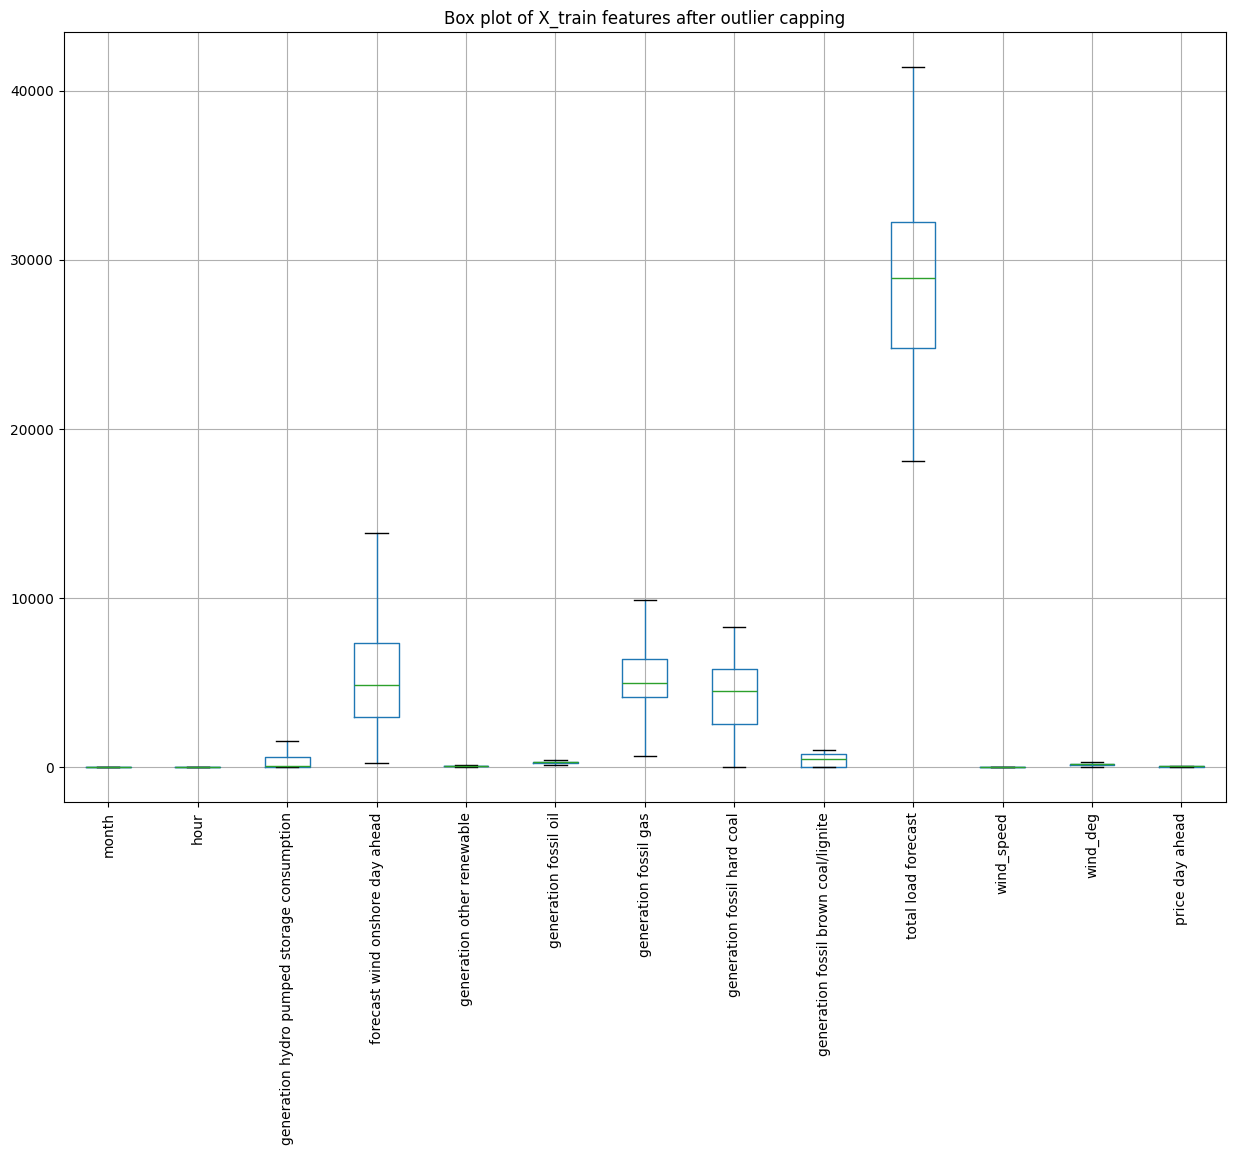

In [ ]:
# Visualize distributions with box plots after capping for train dataset
plt.figure(figsize=(15, 10))
X_train.boxplot()
plt.title('Box plot of X_train features after outlier capping')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Visualize distributions with box plots after capping for test dataset

plt.figure(figsize=(15, 10))
X_test.boxplot()
plt.title('Box plot of X_test features after outlier capping')
plt.xticks(rotation=90)
plt.show()

#### 5.4.5 Feature Scaling

Looking at the above box plots, we can see that the features have very different ranges. Scaling will bring all features to a similar scale, which can improve the performance of algorithms.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

display(X_train.head())
display(X_train.describe())
display(X_test.head())
display(X_test.describe())

month      hour  generation hydro pumped storage consumption  \
0  0.428288 -1.658972                                    -0.710656   
1 -0.729455 -0.646865                                    -0.710656   
2 -0.729455 -0.357691                                    -0.701297   
3 -1.597762  0.509829                                    -0.710656   
4 -1.018891 -1.658972                                    -0.141654   

   forecast wind onshore day ahead  generation other renewable  \
0                        -0.598501                   -1.258938   
1                        -0.886759                    0.239220   
2                        -1.291085                   -0.117484   
3                         0.030308                   -0.830893   
4                        -0.721266                    0.595924   

   generation fossil oil  generation fossil gas  generation fossil hard coal  \
0              -1.309386              -0.365115                    -0.800739   
1              -0.255499               0.004472                    -1.051947   
2              -0.504599              -0.629783                    -1.213803   
3               0.376833              -0.072503                     1.685300   
4              -0.504599              -0.636637                     0.172436   

   generation fossil brown coal/lignite  total load forecast  wind_speed  \
0                             -1.148893            -1.306077   -1.459117   
1                             -1.267435             0.415395   -1.141363   
2                             -1.267435            -0.120213    0.447412   
3                              1.456209             1.330410    0.288535   
4                              0.143779            -1.064379   -0.823608   

   wind_deg  price day ahead  
0  0.615521        -0.257495  
1  0.106992         0.313602  
2 -0.039297        -0.815978  
3  0.608555         0.891706  
4 -0.154238        -0.435481

month          hour  \
count  2.805100e+04  2.805100e+04   
mean  -1.074008e-16 -1.443832e-17   
std    1.000018e+00  1.000018e+00   
min   -1.597762e+00 -1.658972e+00   
25%   -7.294552e-01 -9.360381e-01   
50%    1.388520e-01 -6.851774e-02   
75%    1.007159e+00  7.990026e-01   
max    1.586031e+00  1.666523e+00   

       generation hydro pumped storage consumption  \
count                                 2.805100e+04   
mean                                 -1.317180e-17   
std                                   1.000018e+00   
min                                  -7.106557e-01   
25%                                  -7.106557e-01   
50%                                  -5.871226e-01   
75%                                   4.441923e-01   
max                                   2.176464e+00   

       forecast wind onshore day ahead  generation other renewable  \
count                     2.805100e+04                2.805100e+04   
mean                     -3.191629e-17               -4.285902e-16   
std                       1.000018e+00                1.000018e+00   
min                      -1.662886e+00               -3.292153e+00   
25%                      -7.882284e-01               -8.308932e-01   
50%                      -1.916249e-01                1.678791e-01   
75%                       6.014018e-01                8.099470e-01   
max                       2.685847e+00                2.379446e+00   

       generation fossil oil  generation fossil gas  \
count           2.805100e+04           2.805100e+04   
mean           -2.134085e-17           1.279185e-16   
std             1.000018e+00           1.000018e+00   
min            -2.602792e+00          -2.545731e+00   
25%            -6.770535e-01          -7.331200e-01   
50%             3.192492e-02          -2.870848e-01   
75%             6.067723e-01           4.752873e-01   
max             2.532511e+00           2.287898e+00   

       generation fossil hard coal  generation fossil brown coal/lignite  \
count                 2.805100e+04                          2.805100e+04   
mean                  2.145484e-16                          4.939426e-17   
std                   1.000018e+00                          1.000018e+00   
min                  -2.176256e+00                         -1.267435e+00   
25%                  -8.757953e-01                         -1.267435e+00   
50%                   1.132081e-01                          1.691813e-01   
75%                   8.040298e-01                          8.719661e-01   
max                   2.069260e+00                          1.552171e+00   

       total load forecast    wind_speed      wind_deg  price day ahead  
count         2.805100e+04  2.805100e+04  2.805100e+04     2.805100e+04  
mean         -5.775329e-17 -4.665858e-16  4.458148e-17    -6.418721e-16  
std           1.000018e+00  1.000018e+00  1.000018e+00     1.000018e+00  
min          -2.308547e+00 -1.935750e+00 -2.817046e+00    -2.597765e+00  
25%          -8.536822e-01 -8.236077e-01 -7.010802e-01    -5.948972e-01  
50%           4.360245e-02 -1.880978e-01 -4.465815e-03     3.611199e-02  
75%           7.727210e-01  6.062894e-01  7.095640e-01     7.403477e-01  
max           2.757103e+00  2.751135e+00  2.825530e+00     2.743215e+00

month      hour  generation hydro pumped storage consumption  \
0  0.717723  1.377349                                     0.017441   
1  0.717723 -0.646865                                    -0.710656   
2 -1.597762  0.220656                                    -0.710656   
3 -1.018891  0.943589                                    -0.710656   
4 -0.150584  0.943589                                    -0.710656   

   forecast wind onshore day ahead  generation other renewable  \
0                        -1.126867                   -0.902234   
1                        -1.336364                    1.880060   
2                         0.272967                    0.595924   
3                        -0.852640                   -0.902234   
4                        -0.994537                   -2.043688   

   generation fossil oil  generation fossil gas  generation fossil hard coal  \
0               0.491803               0.054032                     1.434092   
1               0.530126               0.993026                     0.855088   
2               1.698982              -0.913959                    -1.577850   
3               0.549288               1.023078                     0.117293   
4               1.162458               0.503230                     1.920169   

   generation fossil brown coal/lignite  total load forecast  wind_speed  \
0                              1.171144            -0.727177   -0.505853   
1                              0.821162             0.837877   -1.141363   
2                             -1.267435             0.692989    2.751135   
3                             -1.267435             1.118952   -0.664730   
4                              0.575611             0.495019    0.447412   

   wind_deg  price day ahead  
0 -0.979726         0.181864  
1 -0.791640         1.841198  
2  1.249440        -1.161439  
3  0.747878         1.211940  
4  0.692149         0.671676

month         hour  generation hydro pumped storage consumption  \
count  7013.000000  7013.000000                                  7013.000000   
mean      0.003853     0.018878                                     0.007686   
std       0.990921     1.004203                                     1.010683   
min      -1.597762    -1.658972                                    -0.710656   
25%      -0.729455    -0.791451                                    -0.710656   
50%       0.138852     0.076069                                    -0.568405   
75%       1.007159     0.943589                                     0.438577   
max       1.586031     1.666523                                     2.176464   

       forecast wind onshore day ahead  generation other renewable  \
count                      7013.000000                 7013.000000   
mean                          0.013804                   -0.001018   
std                           1.015221                    1.012778   
min                          -1.649812                   -3.042460   
25%                          -0.789504                   -0.902234   
50%                          -0.187161                    0.167879   
75%                           0.620534                    0.809947   
max                           2.685847                    2.308105   

       generation fossil oil  generation fossil gas  \
count            7013.000000            7013.000000   
mean                0.003467              -0.011411   
std                 1.007919               1.002025   
min                -2.602792              -2.103386   
25%                -0.677053              -0.746301   
50%                 0.051086              -0.315028   
75%                 0.625934               0.492686   
max                 2.532511               2.287898   

       generation fossil hard coal  generation fossil brown coal/lignite  \
count                  7013.000000                           7013.000000   
mean                     -0.015586                             -0.014613   
std                       1.007707                              1.003768   
min                      -1.871947                             -1.267435   
25%                      -0.919195                             -1.267435   
50%                       0.087679                              0.169181   
75%                       0.805051                              0.849387   
max                       2.091725                              1.540882   

       total load forecast   wind_speed     wind_deg  price day ahead  
count          7013.000000  7013.000000  7013.000000      7013.000000  
mean             -0.004835     0.019042     0.030907        -0.019150  
std               0.997219     1.013747     1.004764         0.999448  
min              -2.244153    -1.935750    -2.817046        -2.597765  
25%              -0.852703    -0.823608    -0.666250        -0.625379  
50%               0.025111    -0.188098     0.027462         0.024200  
75%               0.769131     0.606289     0.737429         0.720026  
max               2.643324     2.751135     2.825530         2.743215

## 6. Proposed Model Implementation

### 6.1 Support Vector Machine (SVM) for Regression

In [ ]:
from sklearn.svm import SVR

# Instantiate an SVR model
svr_model = SVR()

# Fit the model to the training data
svr_model.fit(X_train, y_train)

SVR()

### 6.2 Decision Tree for Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Instantiate a Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

## 7. Proposed Model Evaluation and Discussion

### 7.1 Support Vector Machine (SVM) for Regression

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the testing data
y_pred_svr = svr_model.predict(X_test)

# Calculate evaluation metrics
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Print the evaluation metrics
print(f"SVM Regression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_svr:.4f}")
print(f"Mean Squared Error (MSE): {mse_svr:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_svr:.4f}")
print(f"R-squared (R2): {r2_svr:.4f}")

SVM Regression Model Performance:
Mean Absolute Error (MAE): 4.6405
Mean Squared Error (MSE): 61.0617
Root Mean Squared Error (RMSE): 7.8142
R-squared (R2): 0.6993


### 7.2 Decision Tree for Regression

In [ ]:
# Make predictions on the testing data
y_pred_dt = dt_model.predict(X_test)

# Calculate evaluation metrics
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Print the evaluation metrics
print(f"Decision Tree Regression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_dt:.4f}")
print(f"Mean Squared Error (MSE): {mse_dt:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_dt:.4f}")
print(f"R-squared (R2): {r2_dt:.4f}")

Decision Tree Regression Model Performance:
Mean Absolute Error (MAE): 3.9997
Mean Squared Error (MSE): 52.9435
Root Mean Squared Error (RMSE): 7.2762
R-squared (R2): 0.7393


### 7.3 Discussion

According to the above results, the Decision Tree outperforms SVR on every metric because trees naturally capture non-linear thresholds and interactions like `load` × `wind` × `price day ahead` and are robust without scaling, whereas the SVR is sensitive to feature scaling and tends to over-smooth price spikes, increasing MAE/RMSE.

Since even Decision Tree’s accuracy (MAE≈4.00, RMSE≈7.28, R²≈0.74) is not sufficient, we will next evaluate we will next evaluate stronger tree ensembles like **Random Forest** for this task.


## 8. Random Forest Implementation and Evaluation

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions on the testing data
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the evaluation metrics
print(f"Random Forest Regression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.4f}")
print(f"R-squared (R2): {r2_rf:.4f}")

Random Forest Regression Model Performance:
Mean Absolute Error (MAE): 2.9589
Mean Squared Error (MSE): 24.3357
Root Mean Squared Error (RMSE): 4.9331
R-squared (R2): 0.8802


The Random Forest is clearly best for this dataset. Compared to the Decision Tree it cuts MAE by ~26%, RMSE by ~32%, and MSE by ~54%, with R² improving from 0.7393 to 0.8802 (+0.141). This makes sense. Because Random Forest averages many trees, capturing non-linear interactions while reducing variance, so it models price dynamics better than a single tree or SVR.

## 9. Conclusion

| Model                       |      MAE ↓ |       MSE ↓ |     RMSE ↓ |       R² ↑ |
| --------------------------- | ---------: | ----------: | ---------: | ---------: |
| Support Vector Machine (SVM)                    |     4.6405 |     61.0617 |     7.8142 |     0.6993 |
| Decision Tree Regressor     |     3.9997 |     52.9435 |     7.2762 |     0.7393 |
| **Random Forest Regressor** | **2.9589** | **24.3357** | **4.9331** | **0.8802** |


We initially proposed SVR and a Decision Tree as primary models. While the Decision Tree outperformed SVR, it did not generalize as well on the test set. In contrast, Random Forest delivered a clear step-up in accuracy as shown in above table, surpassing both the single tree and SVR.

This is because, Random Forest is an ensemble of many Decision Trees whose predictions are averaged for regression. This bagging approach captures non-linear interactions among drivers, reduces variance/overfitting compared to a single tree, and is robust to noise without requiring heavy feature scaling or delicate hyperparameter tuning.

In summary, electricity price formation exhibits complex, non-linear relationships and occasional outliers. The ensemble nature of Random Forest makes it better equipped to handle these complexities, providing more robust and accurate day-ahead price forecasts than a single Decision Tree or our SVR configuration.

## 10. References

[1] A. J. Conejo, M. A. Plazas, R. Espínola, and A. B. Molina, “Day-ahead electricity price forecasting using the wavelet transform and ARIMA models,” IEEE Transactions on Power Systems, vol. 20, no. 2, pp. 1035–1042, 2005.

[2] H. Liu and H. Tian, “A hybrid framework for short-term electricity price forecasting using data preprocessing technique and deep learning,” Energy, vol. 172, pp. 531–548, Apr. 2019.

[3] C. Roussis, “Electricity Price Forecasting with Neural Networks Using the Spanish Electricity Market Dataset,” Energy Reports, 2021.

[4] J. Oliver, “Machine Learning Approaches for Electricity Price Forecasting Using Energy Demand and Weather Data,” Master Thesis, University of Barcelona, 2020.

[5] Y. Liu, H. Sun, and J. Wang, “A Multi-Agent Controller for Shared Energy Systems Based on Energy Price Forecasting,” Applied Energy, vol. 341, 2023.

[6] A. Ansari, S. E. Khademi, and H. Xu, “Chronos: Learning the Language of Time Series,” arXiv preprint, arXiv:2403.07815, 2024.

[7] M. Bilal, F. S. Almutairi, and T. Mahmood, “Comparative Analysis of Time-Series Forecasting Approaches for Energy Consumption and Price,” arXiv preprint, arXiv:2207.01019, 2022.